참고 URL :

* https://www.kaggle.com/kaggle/kaggle-survey-2017

* 캐글을 시작한지 두 달정도 된 초보자로, 이 설문조사의 결과를 바탕으로 데이터사이언스와 머신러닝과 관련 된 인사이트를 얻어볼 수 있지 않을까 가설.

# 데이터 불러오기

In [1]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 시각화를 위한 폰트설정
# 구글코랩 사용시 폰트 설정 필요
# 한글폰트를 설정해주지 않으면 그래프 상에서 한글이 깨져보임
# 한글 출력 가능하게 폰트설정
# 설치 후 런타임 재실행 필수!

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# Colab의 한글폰트 설정
plt.rc('font', family = 'NanumGothic')
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus = False)
# 레티나 설정 시 글씨가 좀 더 선명히 보임
# 폰트 주변이 흐릿하게 보이는 것을 방지
%config InlineBackend.figure_format = 'retina'

In [3]:
#구글 드라이브 연동하기
#구글 드라이브에 데이터를 올린 후 사용할 경우에만 실행
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
question = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA/2017 캐글 머신러닝 및 데이터 사이언스 설문조사/schema.csv')
question.shape

(290, 3)

In [5]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [6]:
# 판다스로 선다형 객관식 문제에 대한 응답을 가져 옴
mcq = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA/2017 캐글 머신러닝 및 데이터 사이언스 설문조사/multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

In [7]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [8]:
mcq.head(10)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,Employed by a company that doesn't perform adv...,SAS Base,Random Forests,F#,Dataset aggregator/platform (i.e. Socrata/Kagg...,"College/University,Conferences,Podcasts,Trade ...",NaN,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,NaN,NaN,Somewhat useful,NaN,NaN,"Becoming a Data Scientist Podcast,Data Machina...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Often,Most of the time,NaN,NaN,NaN,NaN,26-50% of projects,Do not know,Standalone Team,NaN,NaN,Document-oriented (e.g. MongoDB/Elasticsearch)...,"Company Developed Platform,I don't typically s...",NaN,"Mercurial,Subversion,Other",Always,NaN,NaN,I am not currently employed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Random Forests,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Becoming a Data Scientist Podcast,Siraj Raval ...",1-2 years,NaN,Nice to have,Unnecessary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Web services,Deep learning,R,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Arxiv,College/University,Kaggle,Online courses...",Very useful,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,"FastML Blog,No Free Hunch Blog,Talking Machine...",1-2 years,Necessary,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Asking friends, family members, or former coll...",1-2,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Impor

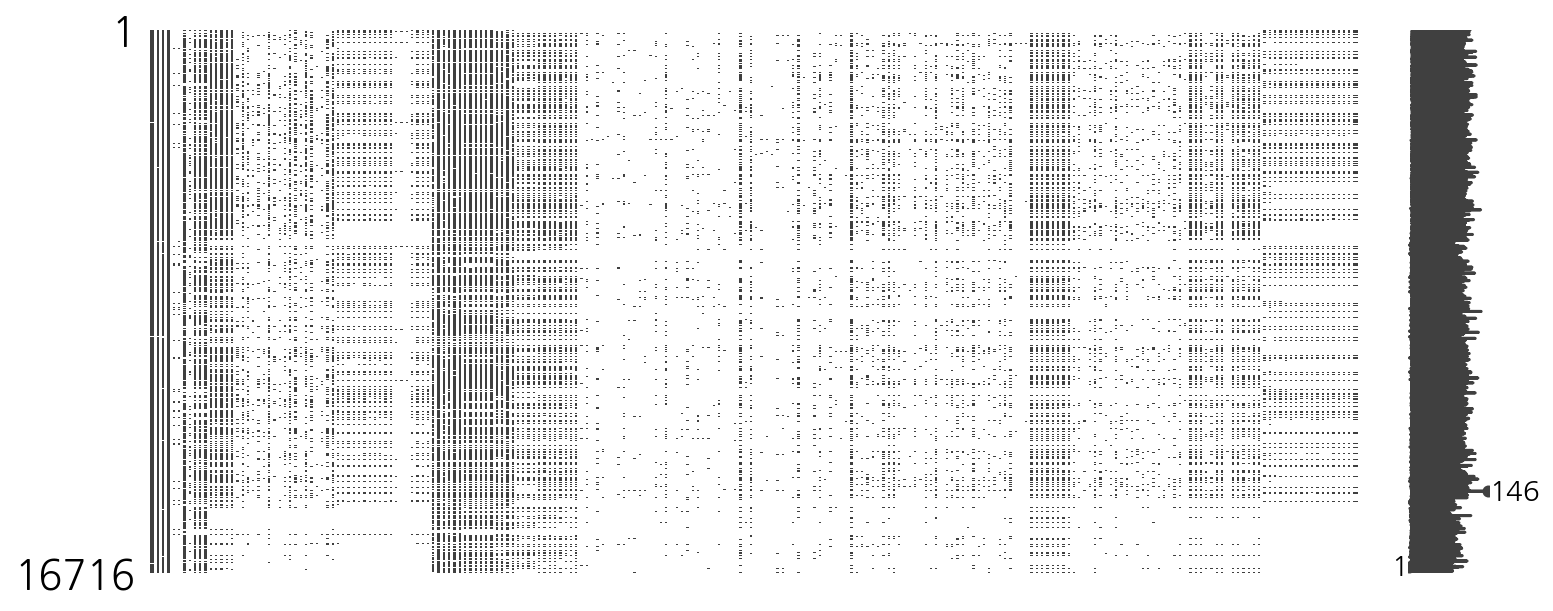

In [9]:
# missingno 는 NAN데이ㅣ터들에 대해 시각화
# NAN 데이터의 컬럼이 많아 아래 그래프만으로는 파악이 어려움
import missingno as msno

msno.matrix(mcq, figsize = (12,5))

* 16,716명의 데이터와 228개의 선다형 객관식 문제와 62개의 주관식 질문에 대한 응답. (총 290개의 질문) 미응답 질문이 많음

# 설문통계

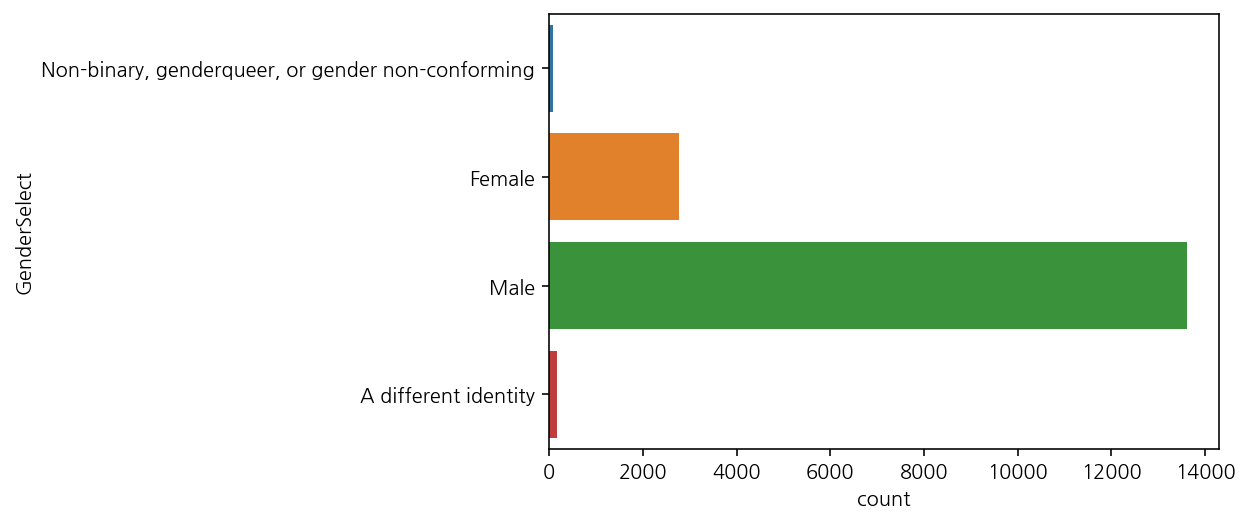

In [10]:
# 성별
sns.countplot(y = 'GenderSelect', data = mcq)

In [11]:
# 국가별 응답 수
con_df = pd.DataFrame(mcq['Country'].value_counts())
print(con_df)

                             Country
United States                   4197
India                           2704
Other                           1023
Russia                           578
United Kingdom                   535
People 's Republic of China      471
Brazil                           465
Germany                          460
France                           442
Canada                           440
Australia                        421
Spain                            320
Japan                            277
Taiwan                           254
Italy                            238
Netherlands                      205
Ukraine                          196
South Korea                      194
Singapore                        184
Poland                           184
Pakistan                         161
Turkey                           144
Indonesia                        131
Switzerland                      129
South Africa                     127
Mexico                           126
C

In [12]:
# 'country' 컬럼 인덱스로 지정
con_df['국가'] = con_df.index
# 컬럼 순서대로 응답 수, 국가로 컬럼명 지정
con_df.columns = ['응답 수', '국가']
con_df.head()

,응답 수,국가
United States,4197,United States
India,2704,India
Other,1023,Other
Russia,578,Russia
United Kingdom,535,United Kingdom


In [13]:
# index 컬럼 삭제 후 순위를 알기 위해 reset_index()해주기
# 우리나라는 18위, 전체 52개국에서 참여했지만 20위까지만 출력
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [14]:
# 연령에 대한 정보 출력
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

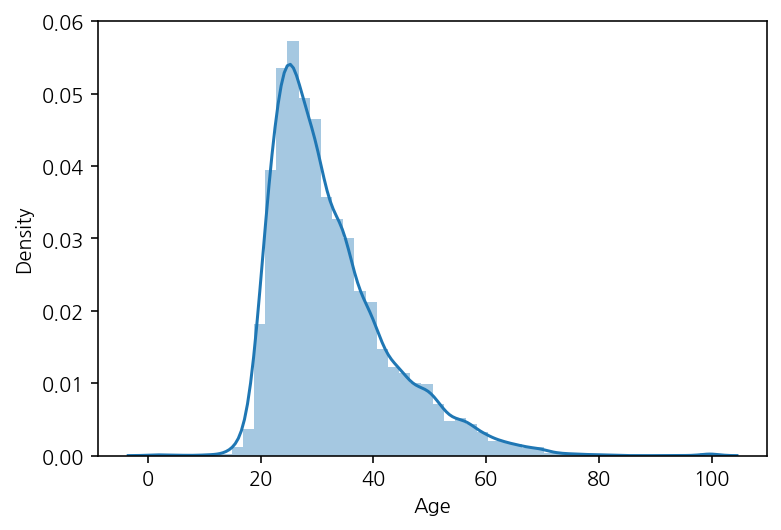

In [15]:
# 연령 정보 시각화
sns.distplot(mcq[mcq['Age']>0]['Age'])

* 응답자 대부분이 어림, 20대 부터 급격히 늘어나며 30대가 가장 많음. 평균 나이는 32세

# 학력

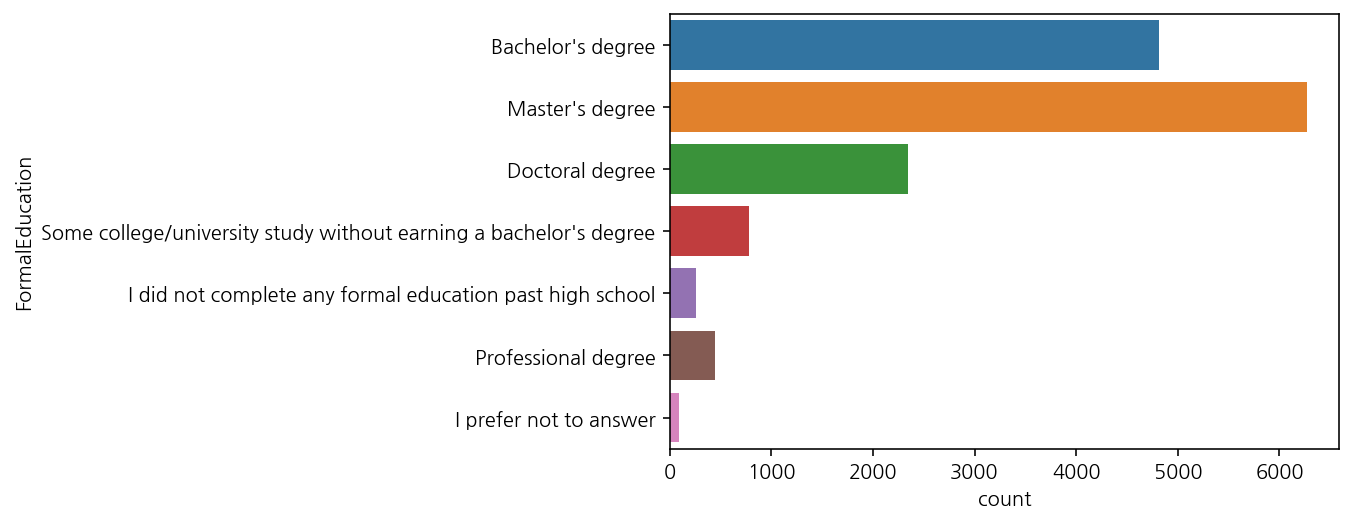

In [16]:
sns.countplot(y = 'FormalEducation', data = mcq)

In [17]:
# value_counts를 사용하면 그룹화 된 데이터의 카운트 값을 출력
# normalize = True 옵션 사용시 해당 데이터가 전체 데이터에서 어느정도 비율 차지하는지 확인 가능
mcq_major_count = pd.DataFrame(
    mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(
    mcq['MajorSelect'].value_counts(normalize = True))
mcq_major_df = mcq_major_count.merge(
    mcq_major_percent, left_index = True, right_index = True)
mcq_major_df.columns = ['응답 수', '비율']
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


* 컴퓨터 전공자들이 33%로 가장 많으며 다음으로 수학, 공학, 전기 공학 순

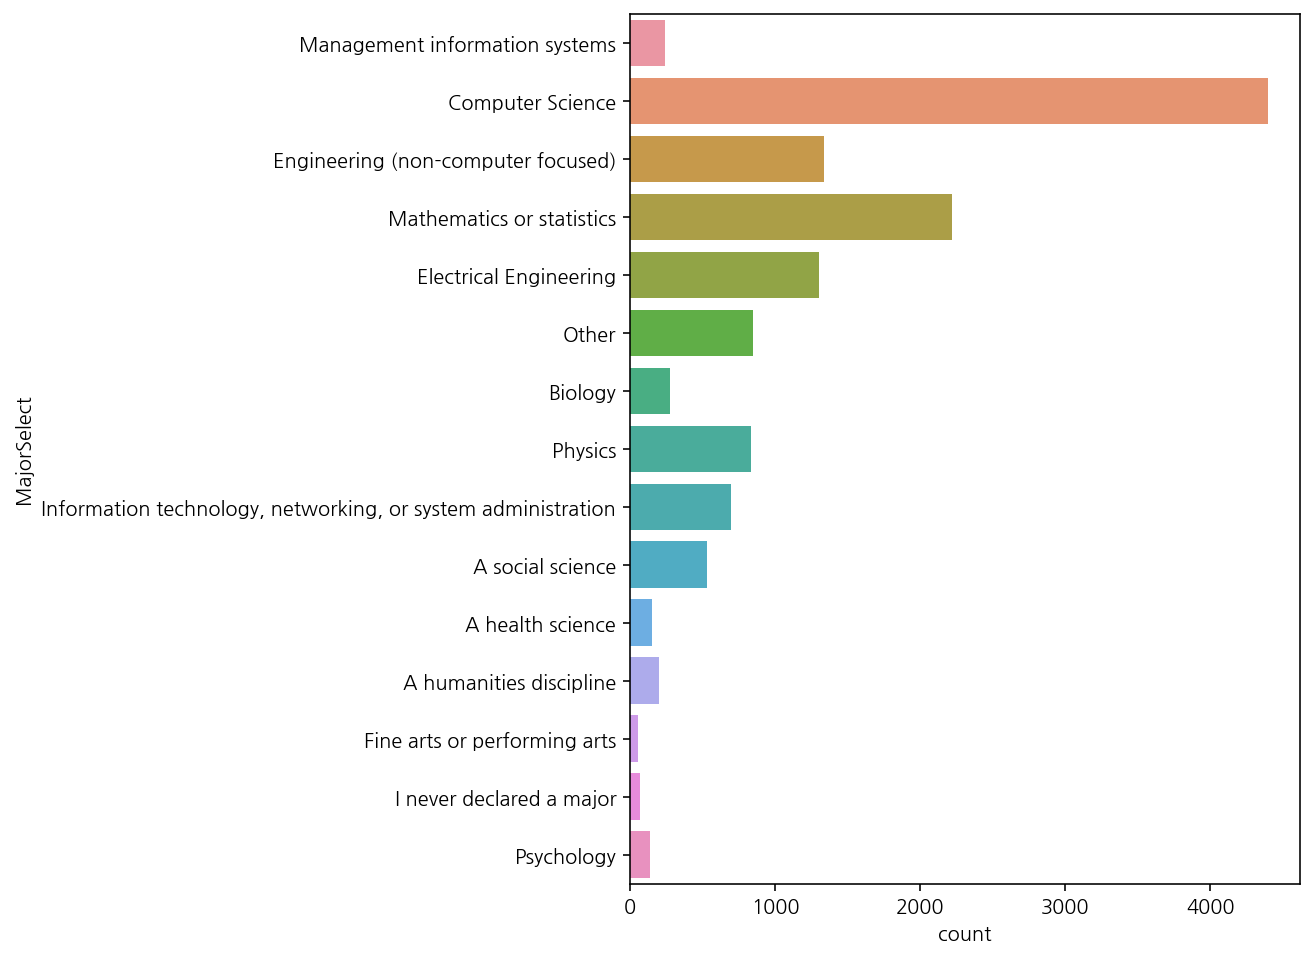

In [18]:
# 재학 중인 사람들의 전공 현황 시각화
plt.figure(figsize=(6,8))
sns.countplot(y = 'MajorSelect', data = mcq)

# 취업여부

In [19]:
# 취업여부 관련 그룹화 하여 데이터 출력
mcq_es_count = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts(normalize = True))
mcq_es_df = mcq_es_count.merge(
    mcq_es_percent, left_index = True, right_index = True)
mcq_es_df.columns = ['응답 수', '비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


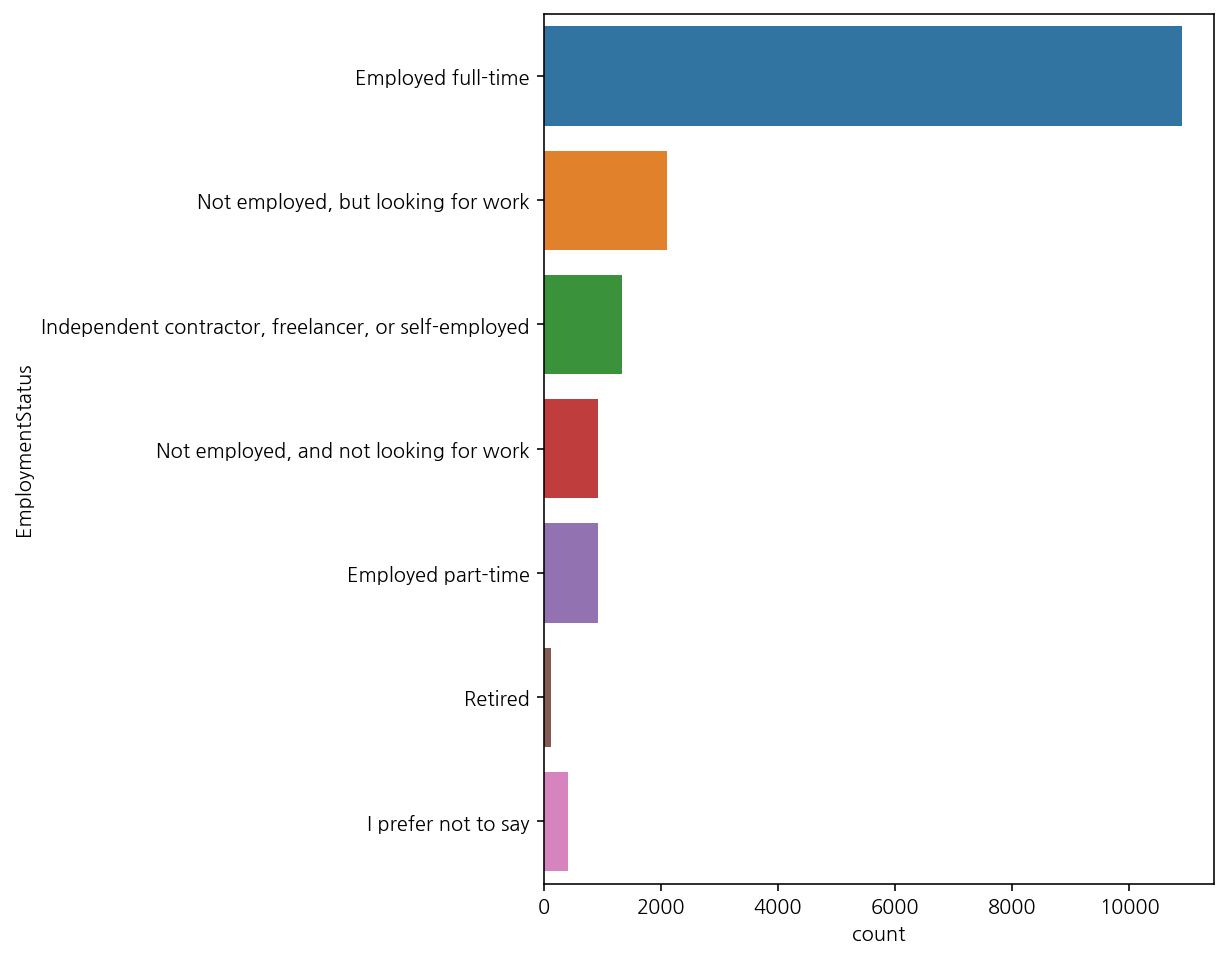

In [20]:
# 취업여부 시각화
plt.figure(figsize=(6,8))
sns.countplot(y = 'EmploymentStatus', data = mcq)

# 프로그래밍 경험
> * 'Tenure'항목은 데이터사이언스 분야에서 코딩경험이 얼마나 되는지에 대한 질문.
대부분 5년 미만, 특히 1-2년의 경험을 가진 사람이 다수



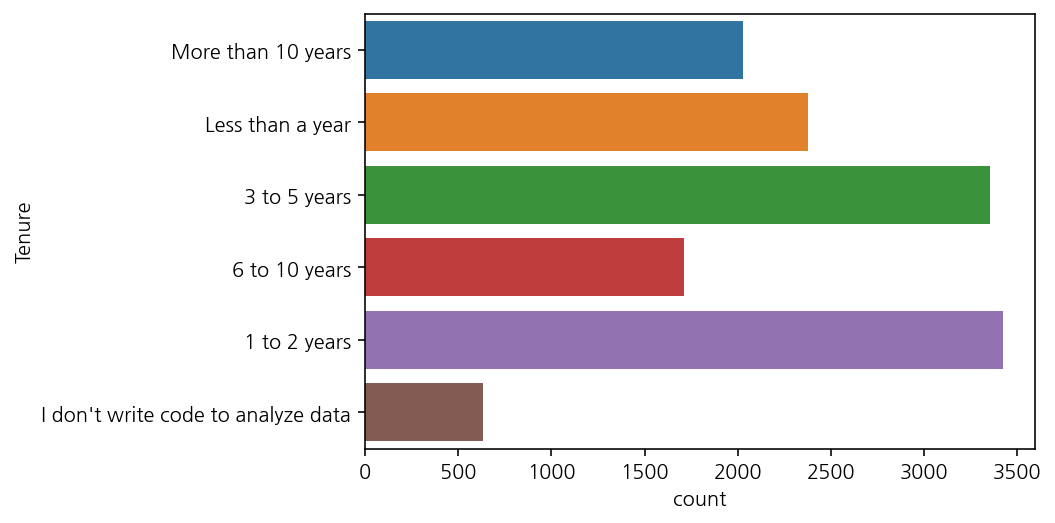

In [21]:
# 프로그래밍 경험 연수 시각화
sns.countplot(y = 'Tenure', data = mcq)

The number of interviewees in Korea: 194


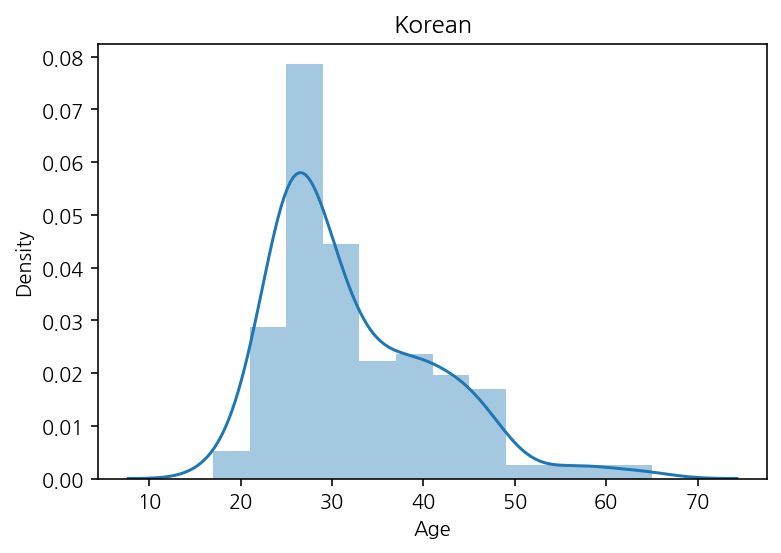

In [22]:
# 한국만 출력하여 시각화
korea = mcq.loc[(mcq['Country'] == 'South Korea')]

print('The number of interviewees in Korea: ' + str(korea.shape[0]))

sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()
                 

In [23]:
# 한국 사람 남녀 비율 출력
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean')

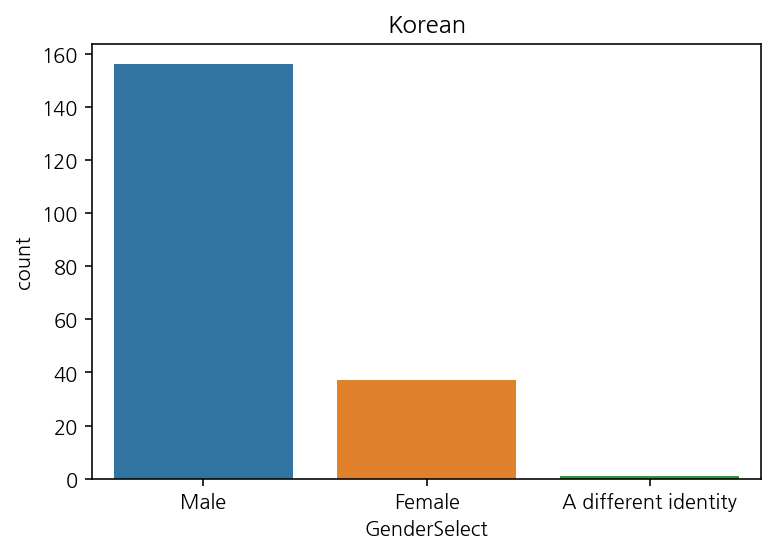

In [24]:
# 한국 사람 남녀 비율 시각화
sns.countplot(x='GenderSelect', data = korea)
plt.title('Korean')

Text(0.5, 1.0, 'Korean Male')

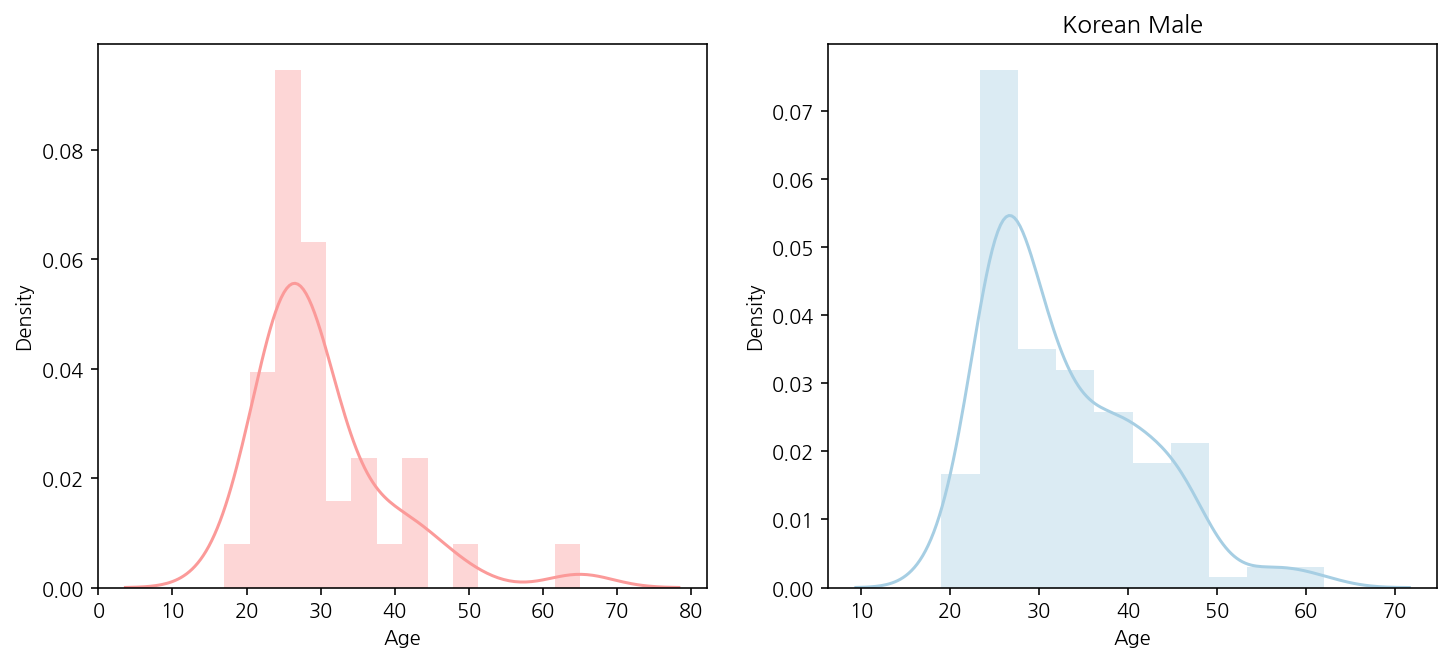

In [25]:
# 성별의 연령대별 시각화
figure, (ax1, ax2) = plt.subplots(ncols = 2)

figure.set_size_inches(12,5)

sns.distplot(korea['Age'].loc[korea['GenderSelect'] == 'Female'].dropna(),
             norm_hist = False, color = sns.color_palette("Paired")[4], ax = ax1)
plt.title('Korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect'] == 'Male'].dropna(),
             norm_hist = False, color = sns.color_palette("Paired")[0], ax = ax2)
plt.title('Korean Male')

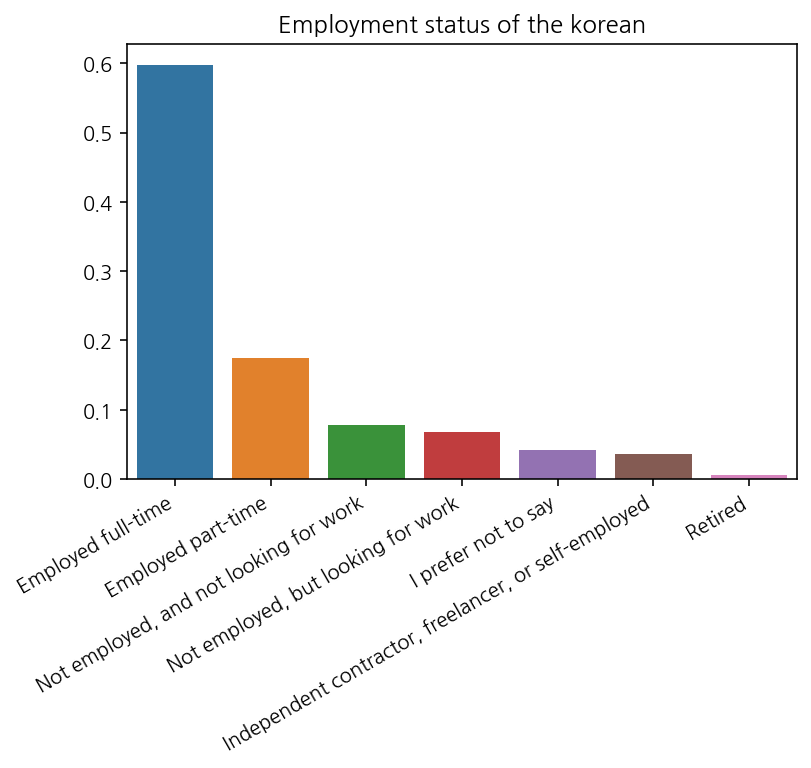

In [26]:
# 한국 응답자 취업 여부
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts()/len(korea))
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

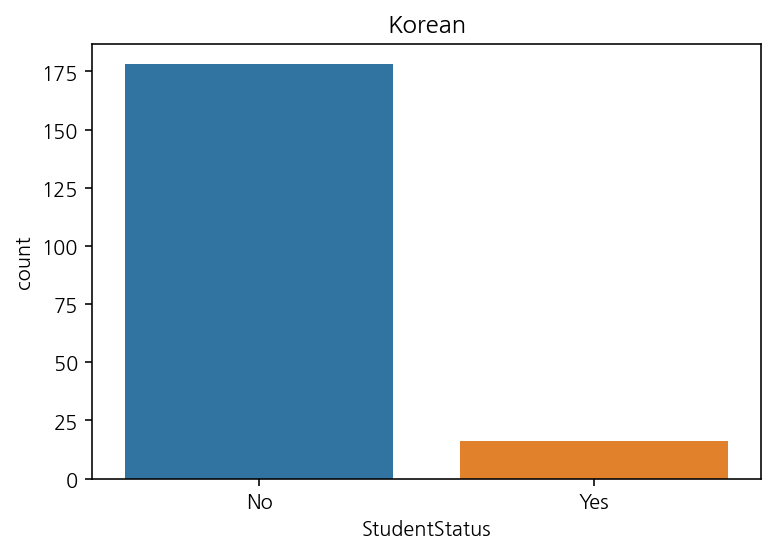

In [27]:
# 학생 여부 시각화
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x = 'StudentStatus', data = korea)
plt.title('Korean')
plt.show()

# 자주 묻는 질문 FAQ
* 초보자들이 묻는 가장 일반적 질문의 답 시각화

# Q1 파이썬과 R 중 어떤 언어를 배워야 하나?

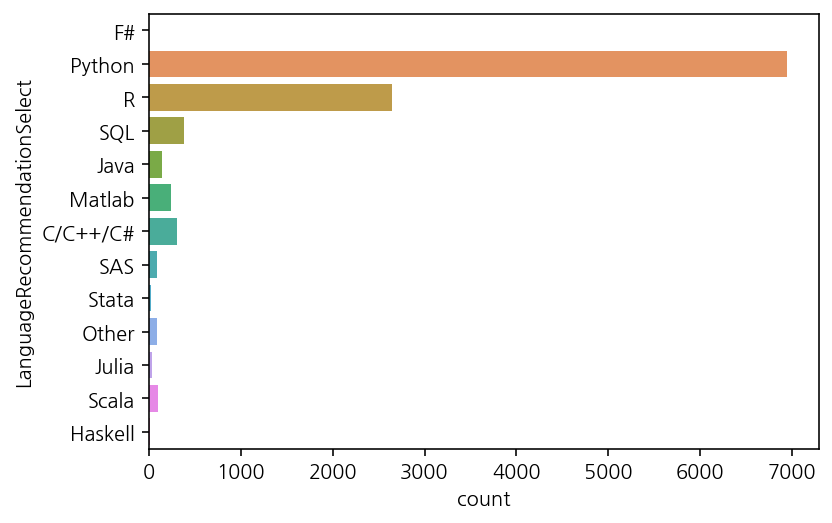

In [28]:
# 질문에 대한 대답 시각화
sns.countplot(y = 'LanguageRecommendationSelect', data = mcq)

* 파이썬을 명확히 선호하는 것을 확인. 전문가와 강사들이 선호하는 언어 확인

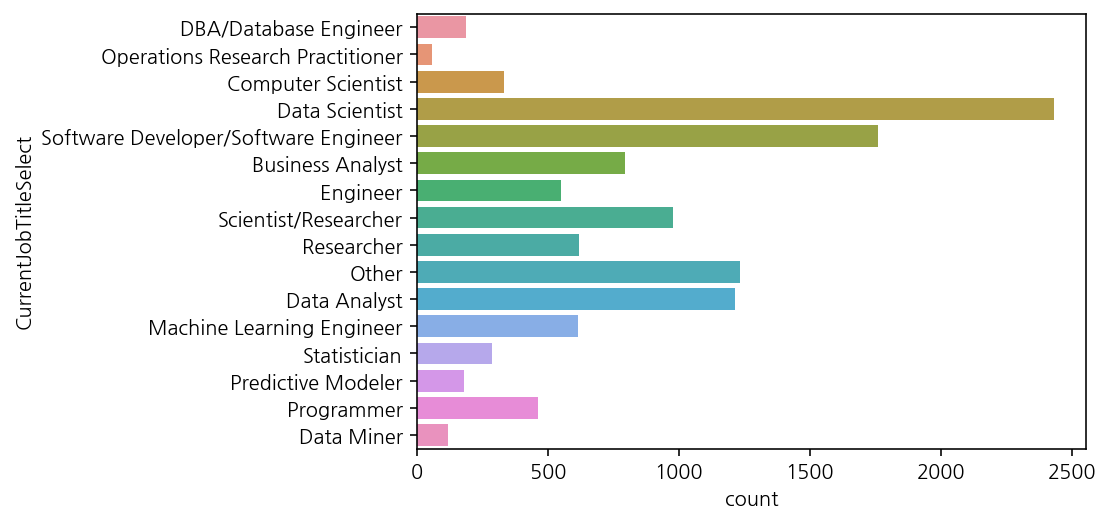

In [29]:
# 답변자의 현재 직업 시각화
sns.countplot(y = mcq['CurrentJobTitleSelect'])

(7158, 228)


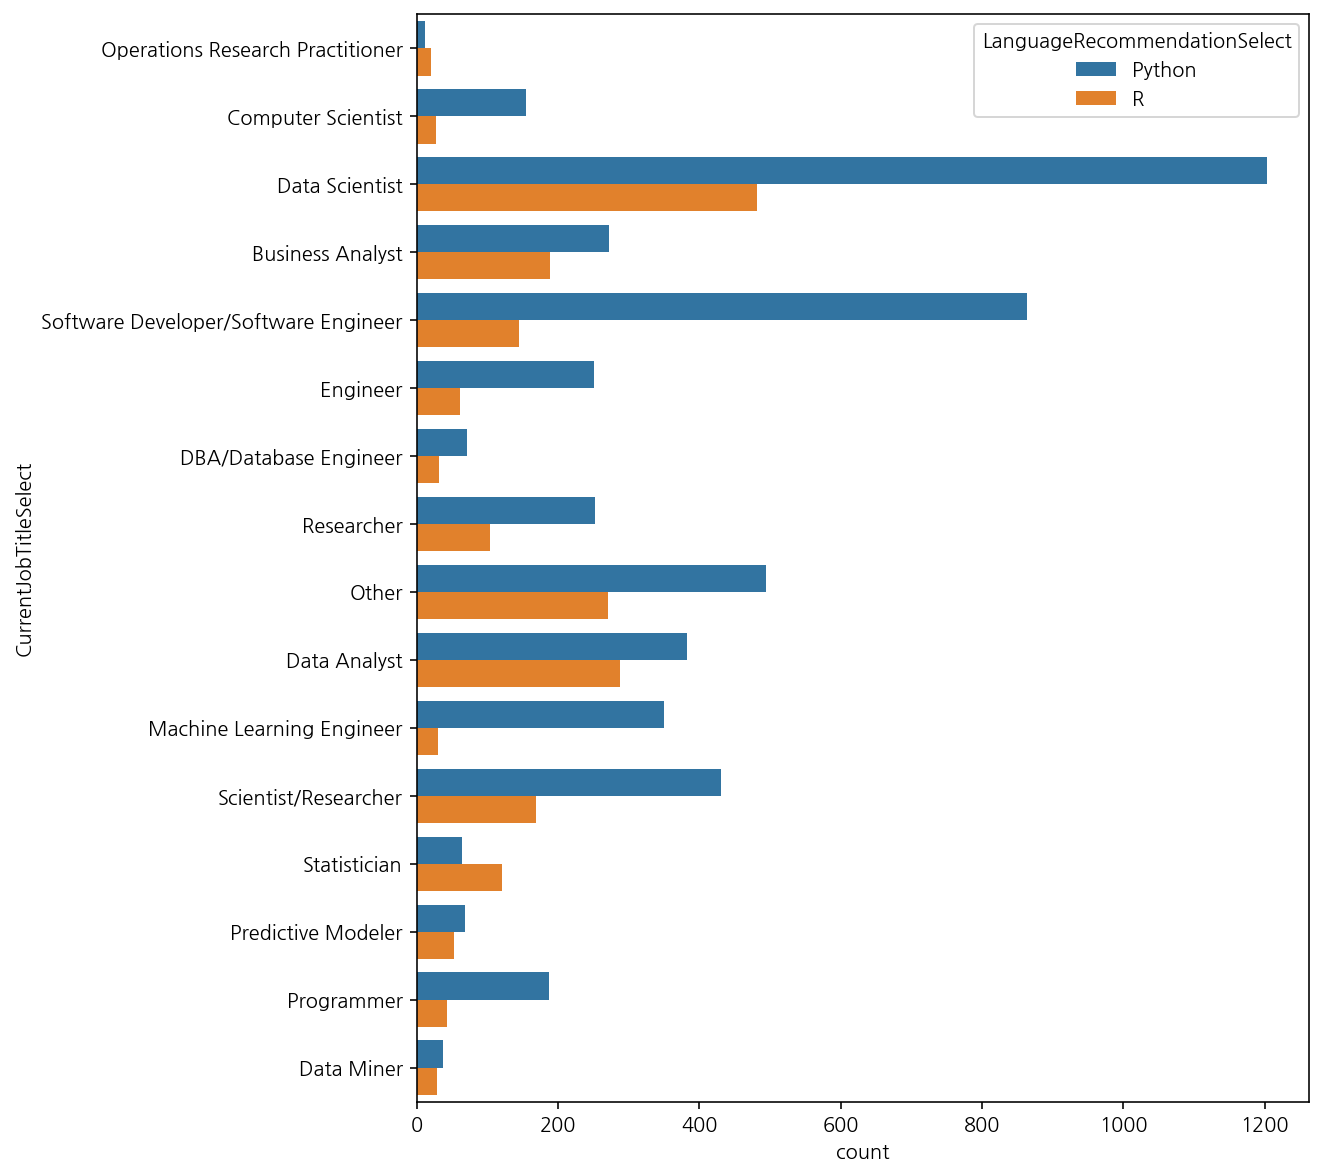

In [30]:
# 현 직업에 대한 응답 수 
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & (
    (mcq['LanguageRecommendationSelect'] == 'Python') | (
        mcq['LanguageRecommendationSelect'] == 'R'))]
print(data.shape)
plt.figure(figsize=(8,10))
sns.countplot(y = 'CurrentJobTitleSelect', hue = 'LanguageRecommendationSelect', data = data)

* 데이터사이언티스트들은 파이썬을 주로 사용하나 R을 사용 하는 사람들도 꽤 존재. 하지만 소프트웨어 개발자들은 파이썬을 더 많이 사용하며 파이썬보다 R을 더 많이 사용하는 직업은 통계학자들임.

# Q2 데이터사이언스 분야에서 앞으로 크게 주목받을 것은 무엇?
* 관련분야 종사자가 아니여도 빅데이터 딥러닝, 뉴럴네트워크 같은 용어에 대해 알고있다. 응답자들이 내년에 가장 흥미로운 기술이 될 것이라 응답한 것.

### 데이터사이언스 툴

In [31]:
# 응답수와 비율 출력
mcq_ml_tool_count = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts(normalize = True))
mcq_ml_tool_df = mcq_ml_tool_count.merge(
    mcq_ml_tool_percent, left_index = True, right_index = True).head(20)
mcq_ml_tool_df.columns = ['응답 수','비율']
mcq_ml_tool_df

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


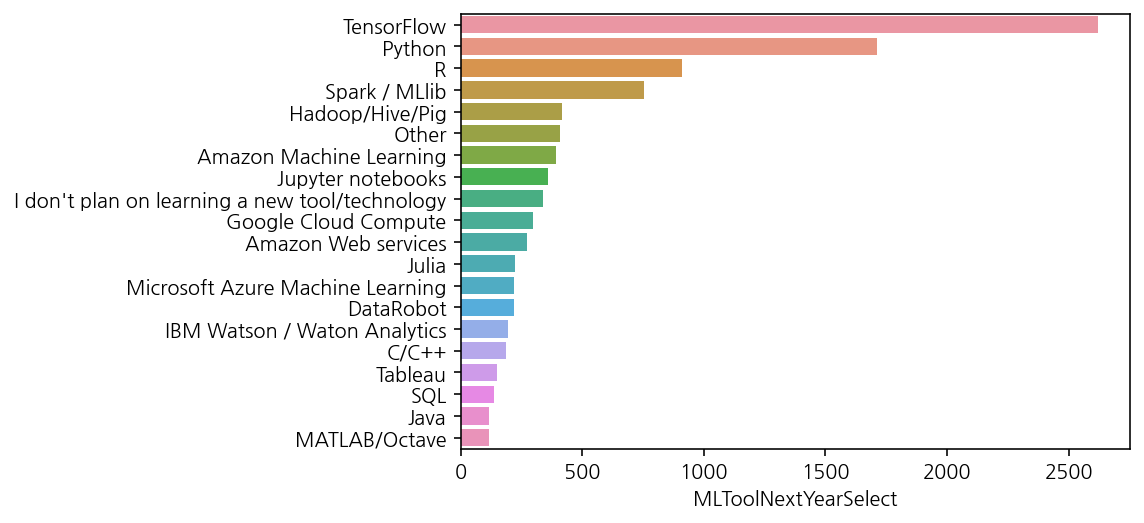

In [32]:
# 위의 응답 시각화
data = mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y = data.index, x = data)

* 구글의 딥러닝 프레임워크 텐서플로우가 23%로 가장 많은 관심을 받을 것이라 응답. 그리고 파이썬이 15%, R이 8%
* 클라우드는 아마존ML, GCP, AWS, NS Azure ML, IBM Watson 순으로 응답

### 데이터사이언스 방법(Data Science Methods)

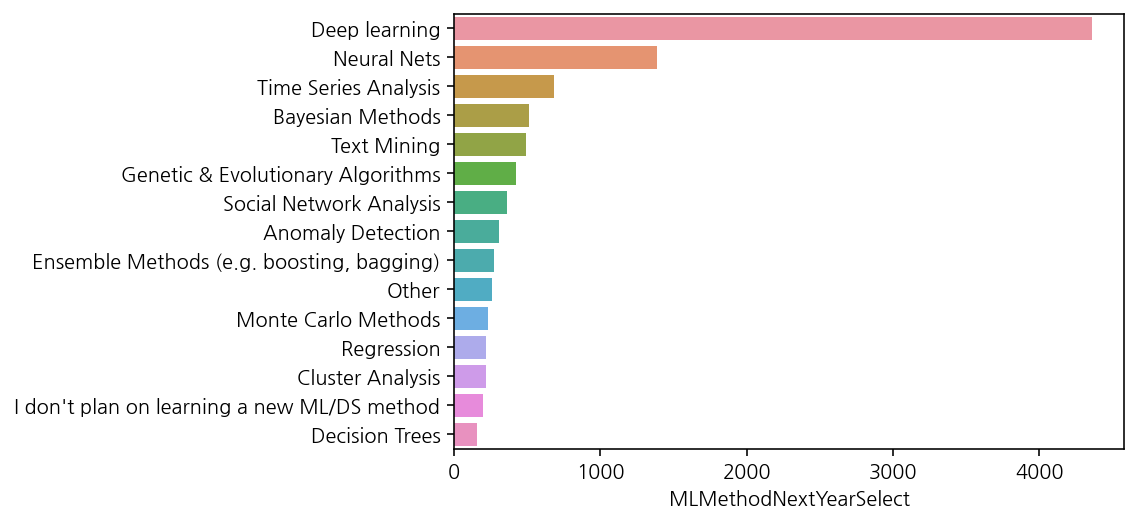

In [33]:
# 데이터사이언스 방법에 대한 응답 시각화
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y = data.index, x = data)

* 응답에 대한 통계를 보면 딥러닝과 뉴럴넷이 엄청나게 인기가 있을 것, 시계열분석, 베이지안, 텍스트 마이닝 등의 내용 존재. 중간 쯤 부스팅과 배깅 같은 앙상블 메소드도 존재.

# Q3 어디에서 데이터사이언스를 배워야 할까?

In [34]:
# 해당 질문에 대한 응답 데이터 정리
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(
    lambda x: pd.Series(x['LearningPlatformSelect']), axis = 1).stack().reset_index(level = 1, drop = True)
print(s.head())
s.name = 'platform'

0    College/University
0           Conferences
0              Podcasts
0            Trade book
1                Kaggle
dtype: object


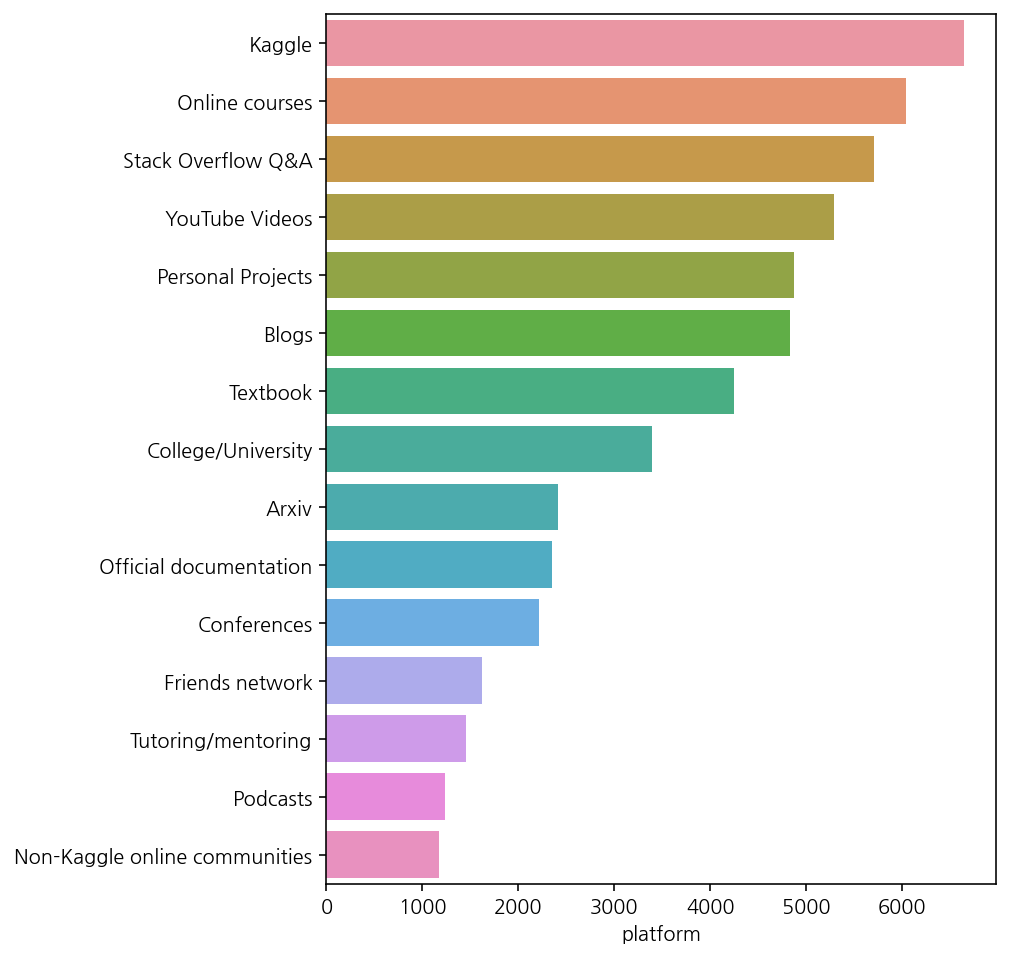

In [35]:
plt.figure(figsize=(6,8))
data = s[s != 'nan'].value_counts().head(15)
sns.barplot(y = data.index, x = data)

* Kaggle은 응답자들 사이에서 가장 인기있는 학습 플랫폼
* 그러나 이 설문조사 실시 플랫폼이 Kaggle이기에 응답이 편향되었을 수 있음
* 온라인 코스, 스택 오버플로 및 유튜브 상위 5대 최우수 학습플랫폼이 대학 학위나 교과서의 중요도보다 높음.

In [36]:
# 설문내용과 누구에게 물어봤는지 출력
qc = question.loc[question['Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [37]:
# 유용한 플랫폼을 use_features에 담기
use_features = [x for x in mcq.columns if x.find(
    'LearningPlatformUsefulness') != -1]
print(use_features)

['LearningPlatformUsefulnessArxiv', 'LearningPlatformUsefulnessBlogs', 'LearningPlatformUsefulnessCollege', 'LearningPlatformUsefulnessCompany', 'LearningPlatformUsefulnessConferences', 'LearningPlatformUsefulnessFriends', 'LearningPlatformUsefulnessKaggle', 'LearningPlatformUsefulnessNewsletters', 'LearningPlatformUsefulnessCommunities', 'LearningPlatformUsefulnessDocumentation', 'LearningPlatformUsefulnessCourses', 'LearningPlatformUsefulnessProjects', 'LearningPlatformUsefulnessPodcasts', 'LearningPlatformUsefulnessSO', 'LearningPlatformUsefulnessTextbook', 'LearningPlatformUsefulnessTradeBook', 'LearningPlatformUsefulnessTutoring', 'LearningPlatformUsefulnessYouTube']


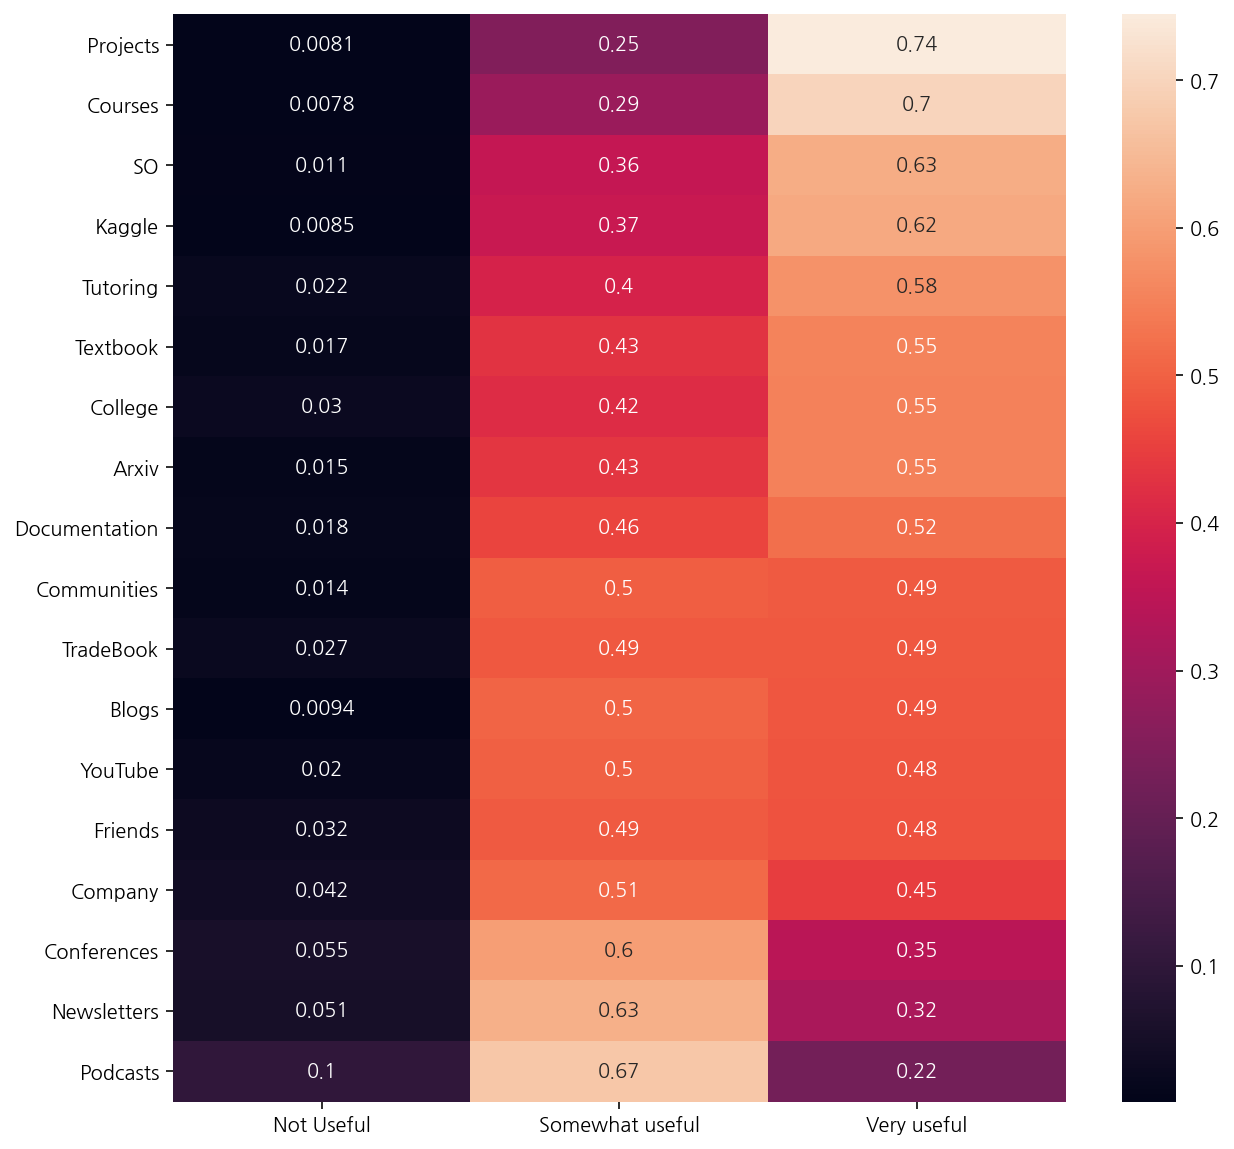

In [38]:
# 학습플랫폼과 유용함에 대한 연관성 확인
fdf = {}
for feature in use_features: 
     a = mcq[feature].value_counts()
     a = a/a.sum()
     fdf[feature[len('LearningPlatformUsefulness'):]] = a

fdf = pd.DataFrame(fdf).transpose().sort_values('Very useful', ascending=False)

# 학습플랫폼이 얼마나 유용한지에 대한 상관관계 시각화
plt.figure(figsize=(10,10))
sns.heatmap(fdf.sort_values("Very useful", ascending=False), annot=True)
# 1에 가까울 수록 유용함이 높음

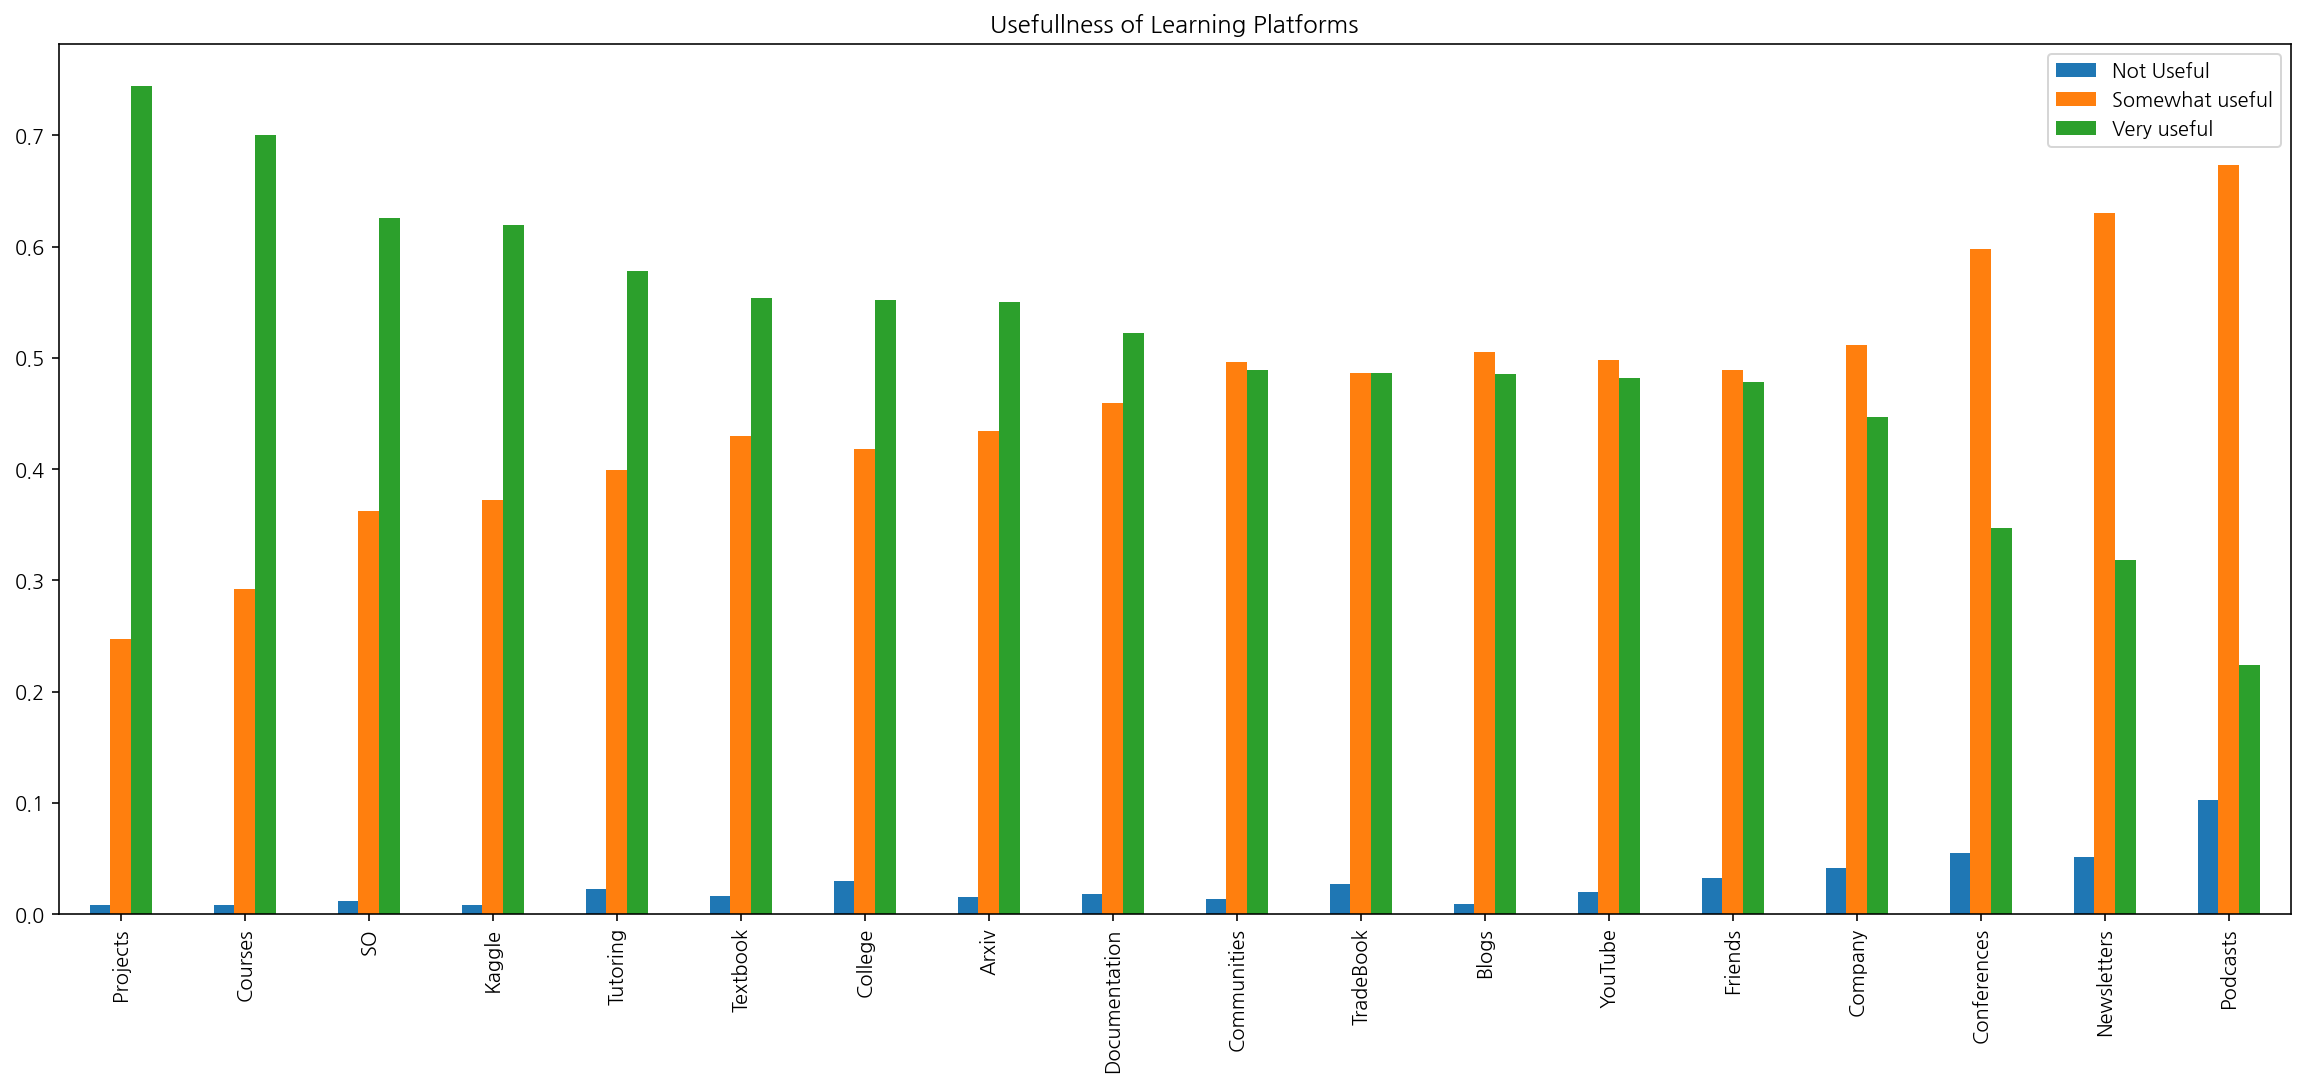

In [39]:
# 유용함의 정도를 각 플랫폼별로 그룹화하여 시각화
fdf.plot(kind = 'bar', figsize = (20,8),
         title = "Usefullness of Learning Platforms")

실제로 프로젝트 하는 것에 대해 응답자의 74.7%가 응답, 매우 유용하다고 표시. SO는 스택오버플로우로 추측되며 캐글, 수업, 책이 도움이 많이되는 편. 팟캐스트는 매우 유용하지 않으나 때때로 유용하다는 응답이 가장 많음.

In [40]:
# 파이차트로 시각화
cat_features = [x for x in mcq.columns if x.find('LearningCategory') != -1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [41]:
cdf = {}
for feature in cat_features:
  cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()

# 파이차트를 그리기위해 평균 값을 구해서 담아주기
cdf = pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

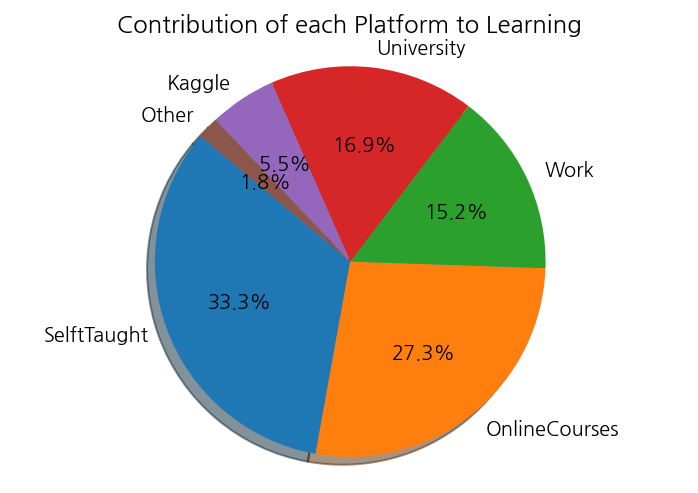

In [42]:
# 학습플랫폼 별 도움되는 정도 시각화
plt.pie(cdf, labels = cdf.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Contribution of each Platform to Learning")
plt.show()

개인프로젝트를 해보는 것이 가장 많이 도움 되었으며 온라인코스와 대학, 업무 그 다음으로 캐글을 통해 배웠다고 응답.

# Q4 데이터사이언스를 위해 고사양의 컴퓨터가 필요?

In [43]:
# 설문내용과 누구에게 질문한지를 확인
qc = question.loc[question['Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [44]:
# 몇 명이 응답?
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()][
    'HardwarePersonalProjectsSelect'].shape

(4206,)

In [45]:
mcq['HardwarePersonalProjectsSelect'
] = mcq['HardwarePersonalProjectsSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x:
              pd.Series(x['HardwarePersonalProjectsSelect']),
              axis = 1).stack().reset_index(level = 1, drop = True)
s.name = 'hardware'

In [46]:
s = s[s != 'nan']

In [47]:
# 어떤 사양을 사용하는지 확인
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
GCE ...),669
Laptop + Cloud service (AWS,669
Azure,669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


# Q5 데이터사이언스 공부에 얼마나 많은 시간 사용?

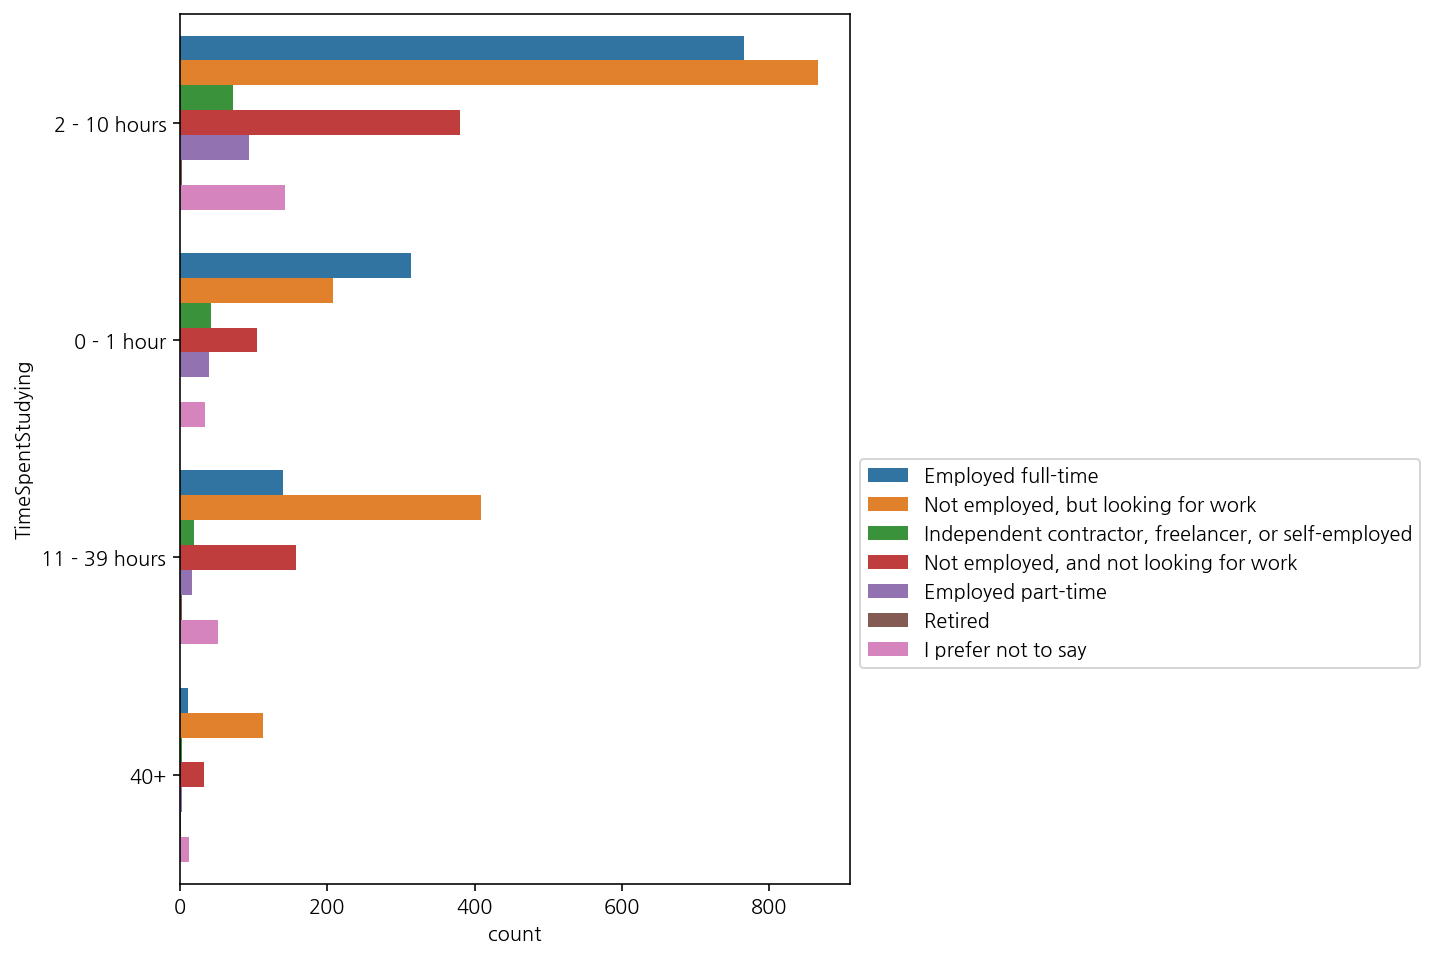

In [48]:
# 해당 질문에 대한 응답 시각화
plt.figure(figsize=(6,8))
sns.countplot(y = 'TimeSpentStudying', data = mcq, 
              hue = 'EmploymentStatus').legend(loc = 'center_left', bbox_to_anchor = (1,0.5))

풀타임으로 일하는 사람들은 2-10시간 일하는 비율이 높고, 풀타임으로 일하는 사람보다 구직자들이 더 많은 시간 공부하는 편. 하지만 응답자 중 대부분이 풀타임으로 일하는 사람이라는 것을 고려해야 함.

In [49]:
# 응답자 데이터 나누기

# 풀타임으로 일하는 사람
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)

# 구직자
looking_for_job = mcq.loc[(mcq['EmploymentStatus'] == 'Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


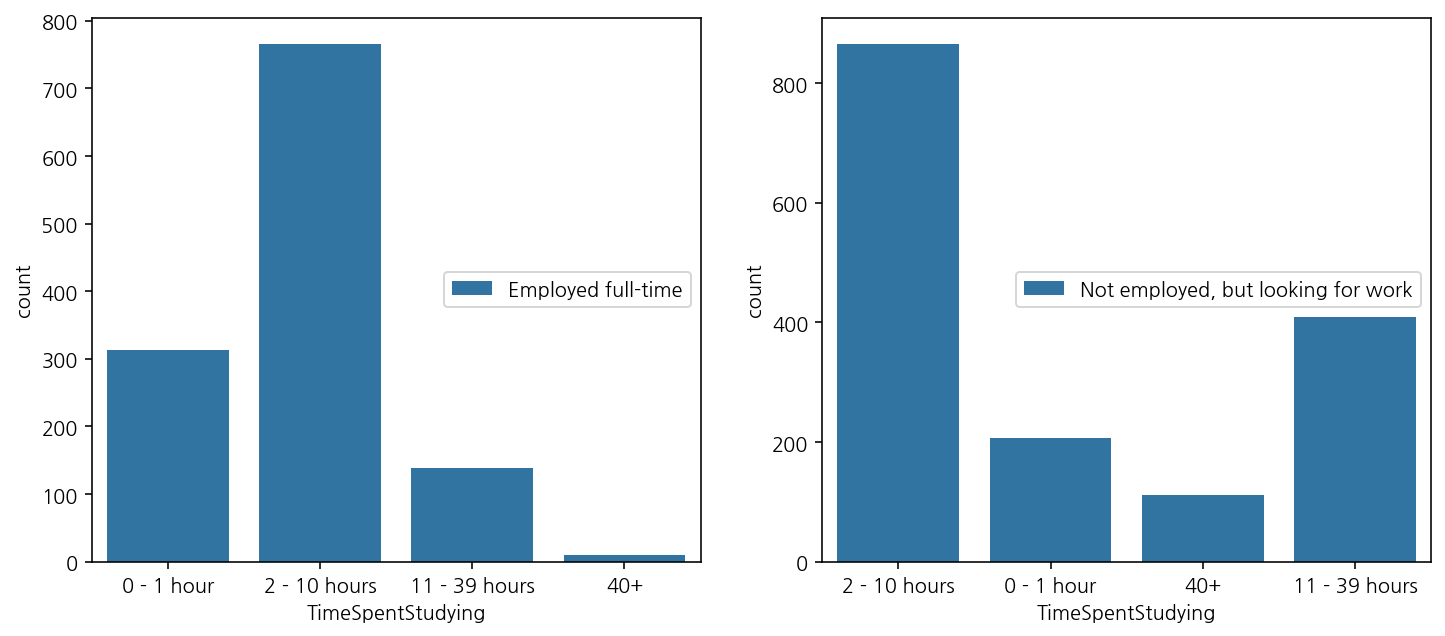

In [50]:
# 구직여부를 나눠서 확인
figure, (ax1, ax2) = plt.subplots(ncols = 2)

figure.set_size_inches(12,5)
sns.countplot(x = 'TimeSpentStudying', data = full_time, 
              hue = 'EmploymentStatus', ax=ax1).legend(loc = 'center right', bbox_to_anchor = (1,0.5))

sns.countplot(x='TimeSpentStudying', data = looking_for_job,
              hue = 'EmploymentStatus', ax=ax2).legend(loc = 'center right', bbox_to_anchor = (1,0.5))

# Q6 블로그, 팟캐스트, 수업, 기타 등등 추천할만한 것은?

In [51]:
# 분류
mcq['BlogsPodcastsNewslettersSelect'] = mcq[
    'BlogsPodcastsNewslettersSelect'].astype('str').apply(lambda x: x.split(','))
mcq['BlogsPodcastsNewslettersSelect'].head()

0    [Becoming a Data Scientist Podcast, Data Machi...
1    [Becoming a Data Scientist Podcast, Siraj Rava...
2    [FastML Blog, No Free Hunch Blog, Talking Mach...
3                                     [KDnuggets Blog]
4    [Data Machina Newsletter, Jack's Import AI New...
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [52]:
s = mcq.apply(lambda x: pd.Series(x['BlogsPodcastsNewslettersSelect']),
              axis = 1).stack().reset_index(level = 1, drop = True)
s.name = 'platforms'
s.head()

0    Becoming a Data Scientist Podcast
0              Data Machina Newsletter
0             O'Reilly Data Newsletter
0         Partially Derivative Podcast
0           R Bloggers Blog Aggregator
Name: platforms, dtype: object

In [53]:
s = s[s != 'nan'].value_counts().head(20)

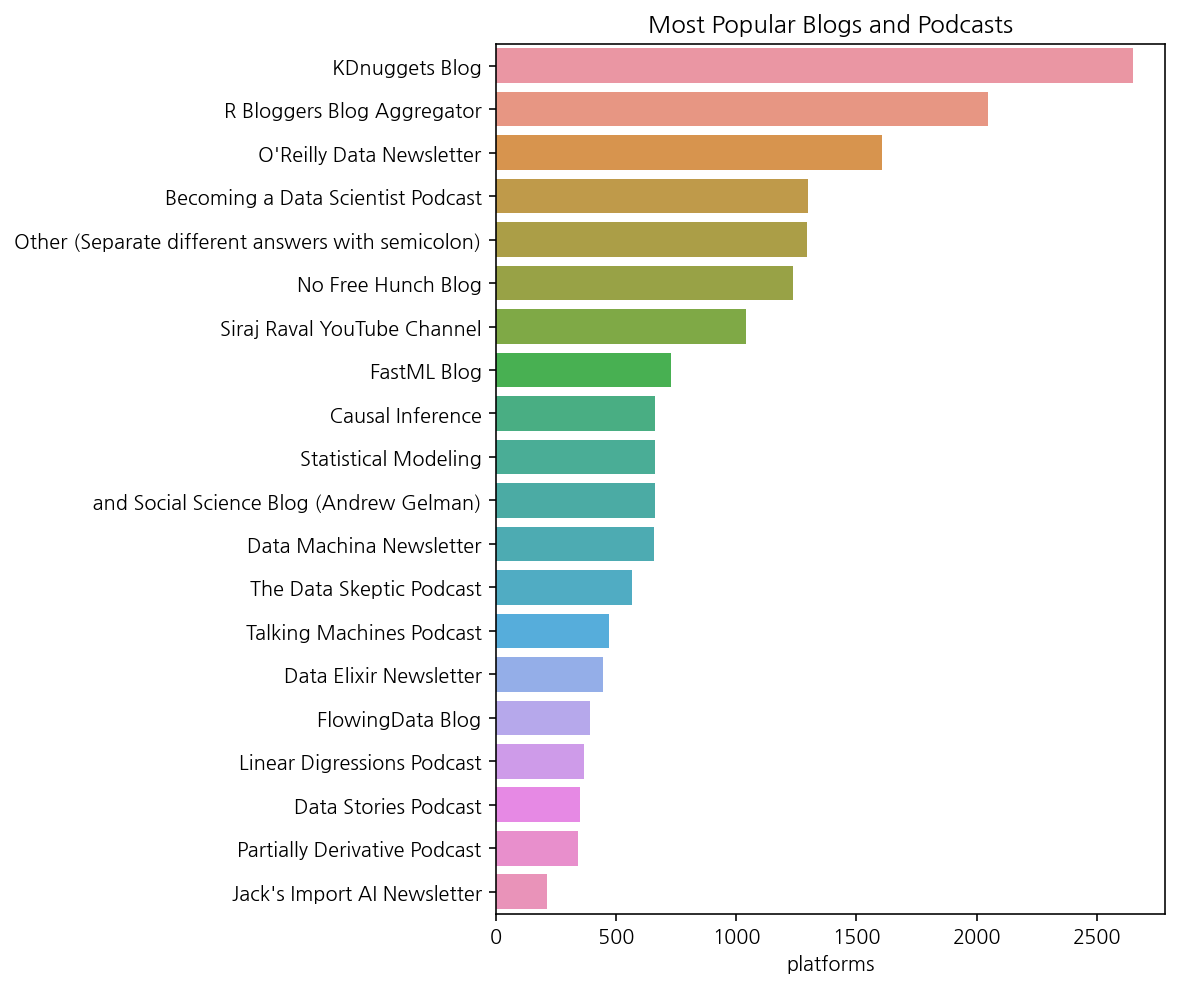

In [54]:
# 정리해준 데이터 시각화
plt.figure(figsize=(6,8))
plt.title("Most Popular Blogs and Podcasts")
sns.barplot(y = s.index, x = s)

In [55]:
# 분류 2
mcq['CoursePlatformSelect'] = mcq['CoursePlatformSelect'].astype(
    'str').apply(lambda x : x.split(','))
mcq['CoursePlatformSelect'].head()

0              [nan]
1              [nan]
2    [Coursera, edX]
3              [nan]
4              [nan]
Name: CoursePlatformSelect, dtype: object

In [56]:
t = mcq.apply(lambda x : pd.Series(x['CoursePlatformSelect']),
              axis = 1).stack().reset_index(level = 1, drop = True)
t.name = 'courses'
t.head(20)

0          nan
1          nan
2     Coursera
2          edX
3          nan
4          nan
5          nan
6          nan
7     Coursera
8          nan
9          nan
10    Coursera
11         nan
12    Coursera
12    DataCamp
12         edX
13         nan
14         nan
15         nan
16         nan
Name: courses, dtype: object

In [57]:
t = t[t != 'nan'].value_counts()

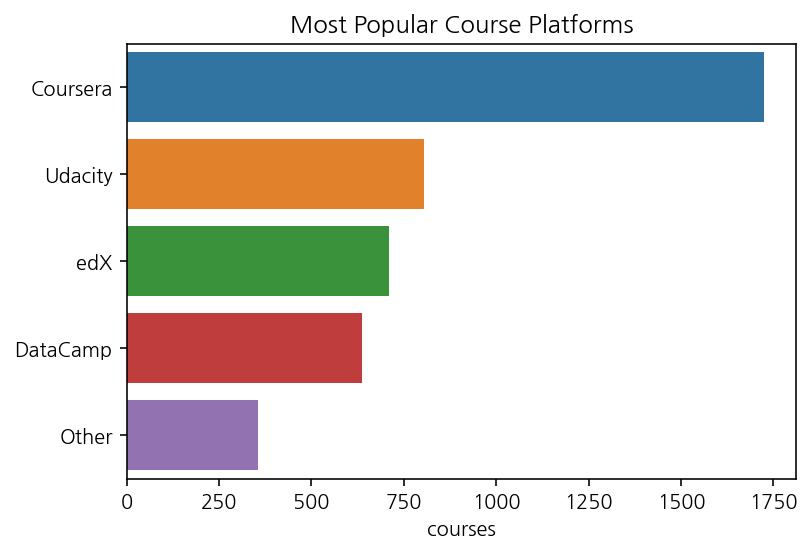

In [58]:
# 분류한 데이터 시각화
plt.title("Most Popular Course Platforms")
sns.barplot(y = t.index, x = t)

# Q7 데이터사이언스 직무에서 가장 중요하다고 생각되는 스킬은?

In [59]:
# 'JobSkillImportance'가 들어있는 데이터 모아서 job_features에 넣기
job_features = [x for x in mcq.columns if x.find('JobSkillImportance') != -1
                and x.find('JobSkillImportanceOther') == -1]
job_features

['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations']

In [60]:
# value_counts로 해당 응답 담기
jdf = {}
for feature in job_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jdf[feature[len('JobSkillImportance'):]] = a

jdf

{'BigData': Nice to have    0.574065
 Necessary       0.379929
 Unnecessary     0.046006
 Name: JobSkillImportanceBigData, dtype: float64,
 'Degree': Nice to have    0.598107
 Necessary       0.279867
 Unnecessary     0.122026
 Name: JobSkillImportanceDegree, dtype: float64,
 'EnterpriseTools': Nice to have    0.564970
 Unnecessary     0.290200
 Necessary       0.144829
 Name: JobSkillImportanceEnterpriseTools, dtype: float64,
 'KaggleRanking': Nice to have    0.677261
 Unnecessary     0.203876
 Necessary       0.118863
 Name: JobSkillImportanceKaggleRanking, dtype: float64,
 'MOOC': Nice to have    0.606994
 Unnecessary     0.285752
 Necessary       0.107255
 Name: JobSkillImportanceMOOC, dtype: float64,
 'Python': Necessary       0.645994
 Nice to have    0.327214
 Unnecessary     0.026792
 Name: JobSkillImportancePython, dtype: float64,
 'R': Nice to have    0.513945
 Necessary       0.414807
 Unnecessary     0.071247
 Name: JobSkillImportanceR, dtype: float64,
 'SQL': Nice to have 

In [61]:
# 정리한 데이터 표로 출력
# transpose를 하면 x축과 y축 바뀜
jdf = pd.DataFrame(jdf).transpose()
jdf

,Necessary,Nice to have,Unnecessary
BigData,0.379929,0.574065,0.046006
Degree,0.279867,0.598107,0.122026
Stats,0.513889,0.457576,0.028535
EnterpriseTools,0.144829,0.564970,0.290200
Python,0.645994,0.327214,0.026792
R,0.414807,0.513945,0.071247
SQL,0.434224,0.491778,0.073998
KaggleRanking,0.118863,0.677261,0.203876
MOOC,0.107255,0.606994,0.285752
Visualizations,0.455392,0.490820,0.053788


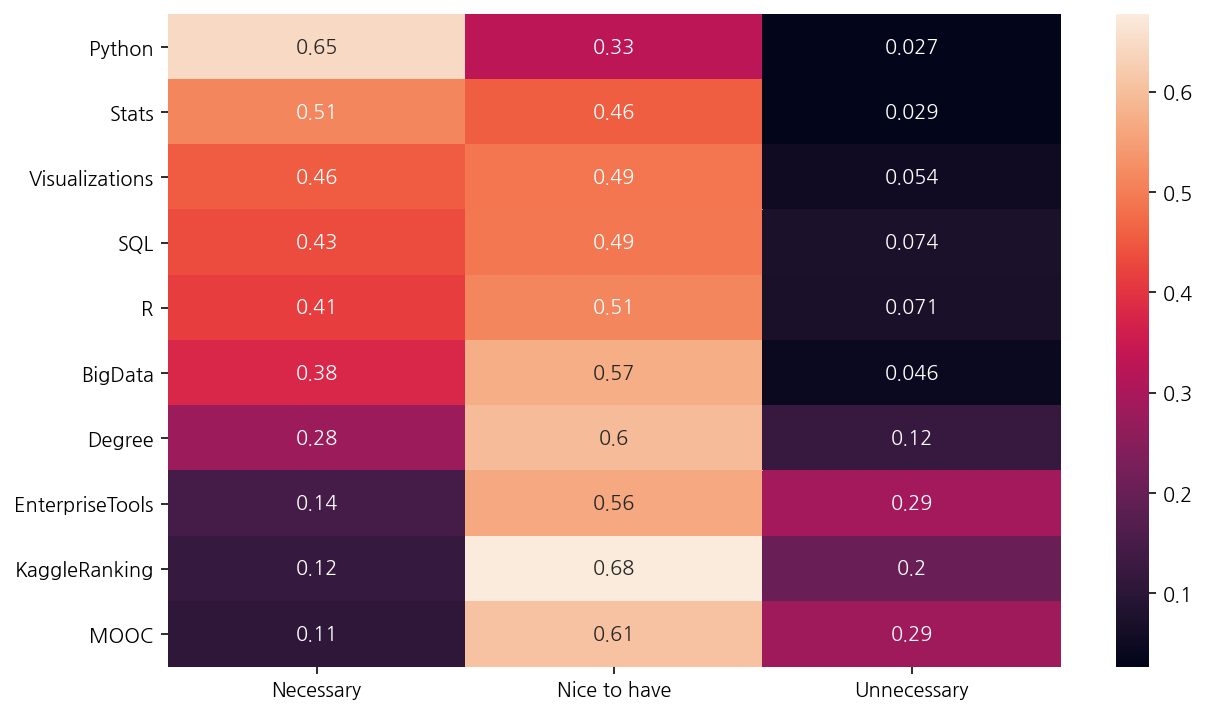

In [62]:
 # 출력 데이터 시각화
 # 1에 가까울 수록 필요한 것
 plt.figure(figsize=(10,6))
 sns.heatmap(jdf.sort_values("Necessary", ascending=False), annot=True)

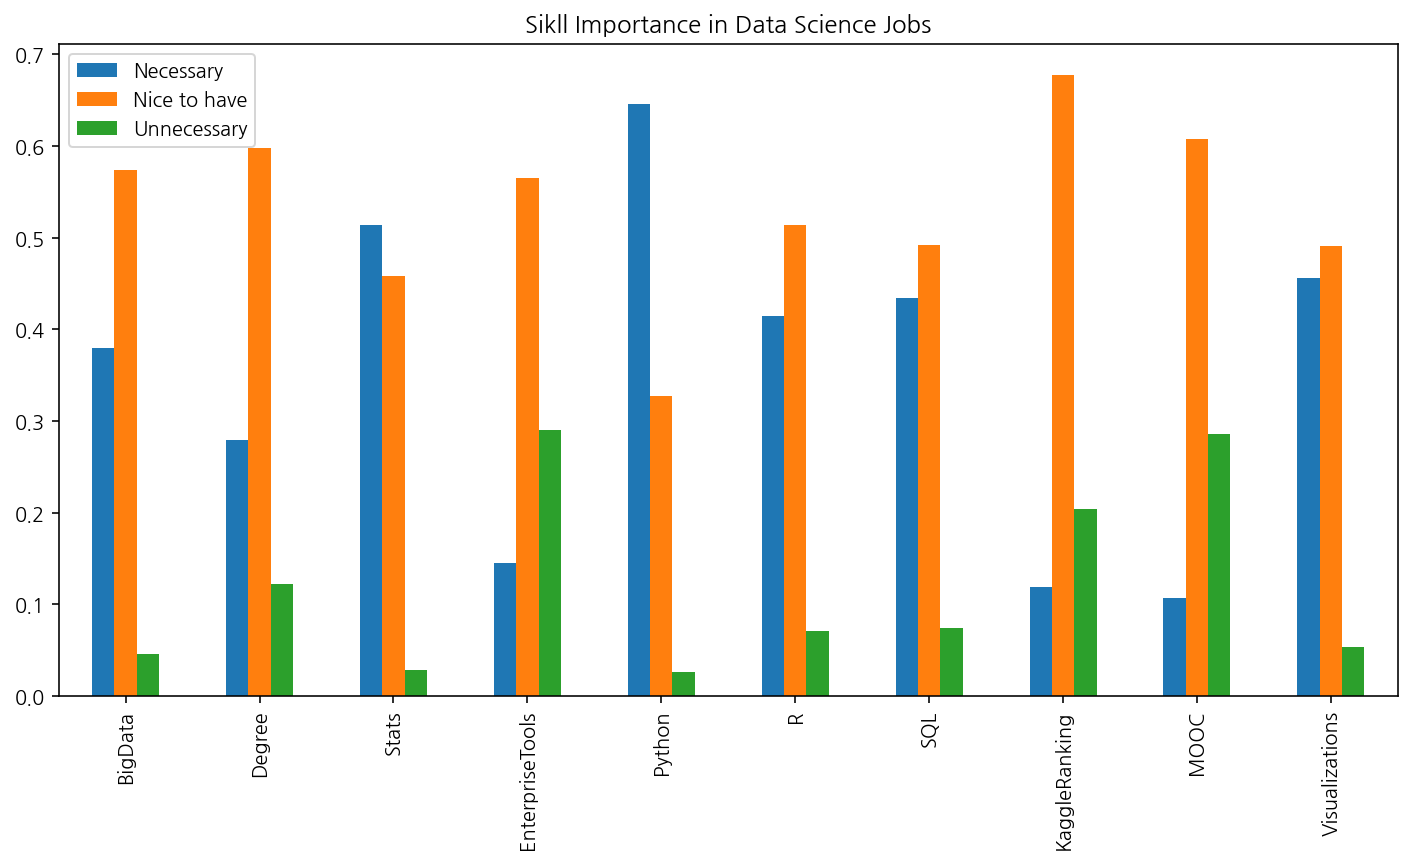

In [63]:
# 위의 히트맵을 막대그래프로 시각화
jdf.plot(kind = 'bar', figsize=(12,6), title = "Sikll Importance in Data Science Jobs")

* 꼭 필요한 것: 파이썬, R, SQL, 통계, 시각화
* 있으면 좋은 것: 빅데이터, 학위, 툴 사용법, 캐글랭킹, 무크

# Q8 데이터사이언티스트 평균 급여는?

In [64]:
# 응답 인원
mcq[mcq['CompensationAmount'].notnull()].shape

(5224, 228)

In [65]:
# 숫자로 변환 시 오류 방지
mcq['CompensationAmount'] = mcq['CompensationAmount'].str.replace(',','')
mcq['CompensationAmount'] = mcq['CompensationAmount'].str.replace('-','')

# 환율계산을 위한 정보 가져오기
rates = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA/2017 캐글 머신러닝 및 데이터 사이언스 설문조사/conversionRates.csv')
rates.drop('Unnamed: 0', axis = 1, inplace = True)

salary = mcq[['CompensationAmount','CompensationCurrency','GenderSelect',
              'Country','CurrentJobTitleSelect']].dropna()
salary = salary.merge(rates, left_on = 'CompensationCurrency', right_on = 'originCountry',
                      how = 'left')
salary['Salary'] = pd.to_numeric(salary['CompensationAmount']) * salary['exchangeRate']
salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.9
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4


In [66]:
print('Maximum Salary is USD $',
      salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $',
      salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $',
      salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 28297400000
Minimum Salary is USD $ 0
Median Salary is USD $ 53812.0


*가장 큰 수치는 여러 국가들의 GDP보다 큼. 즉, 가짜 응답!
* 평균급여는 USD $ 53,812 이다.

Text(0.5, 1.0, 'Salary Distribution')

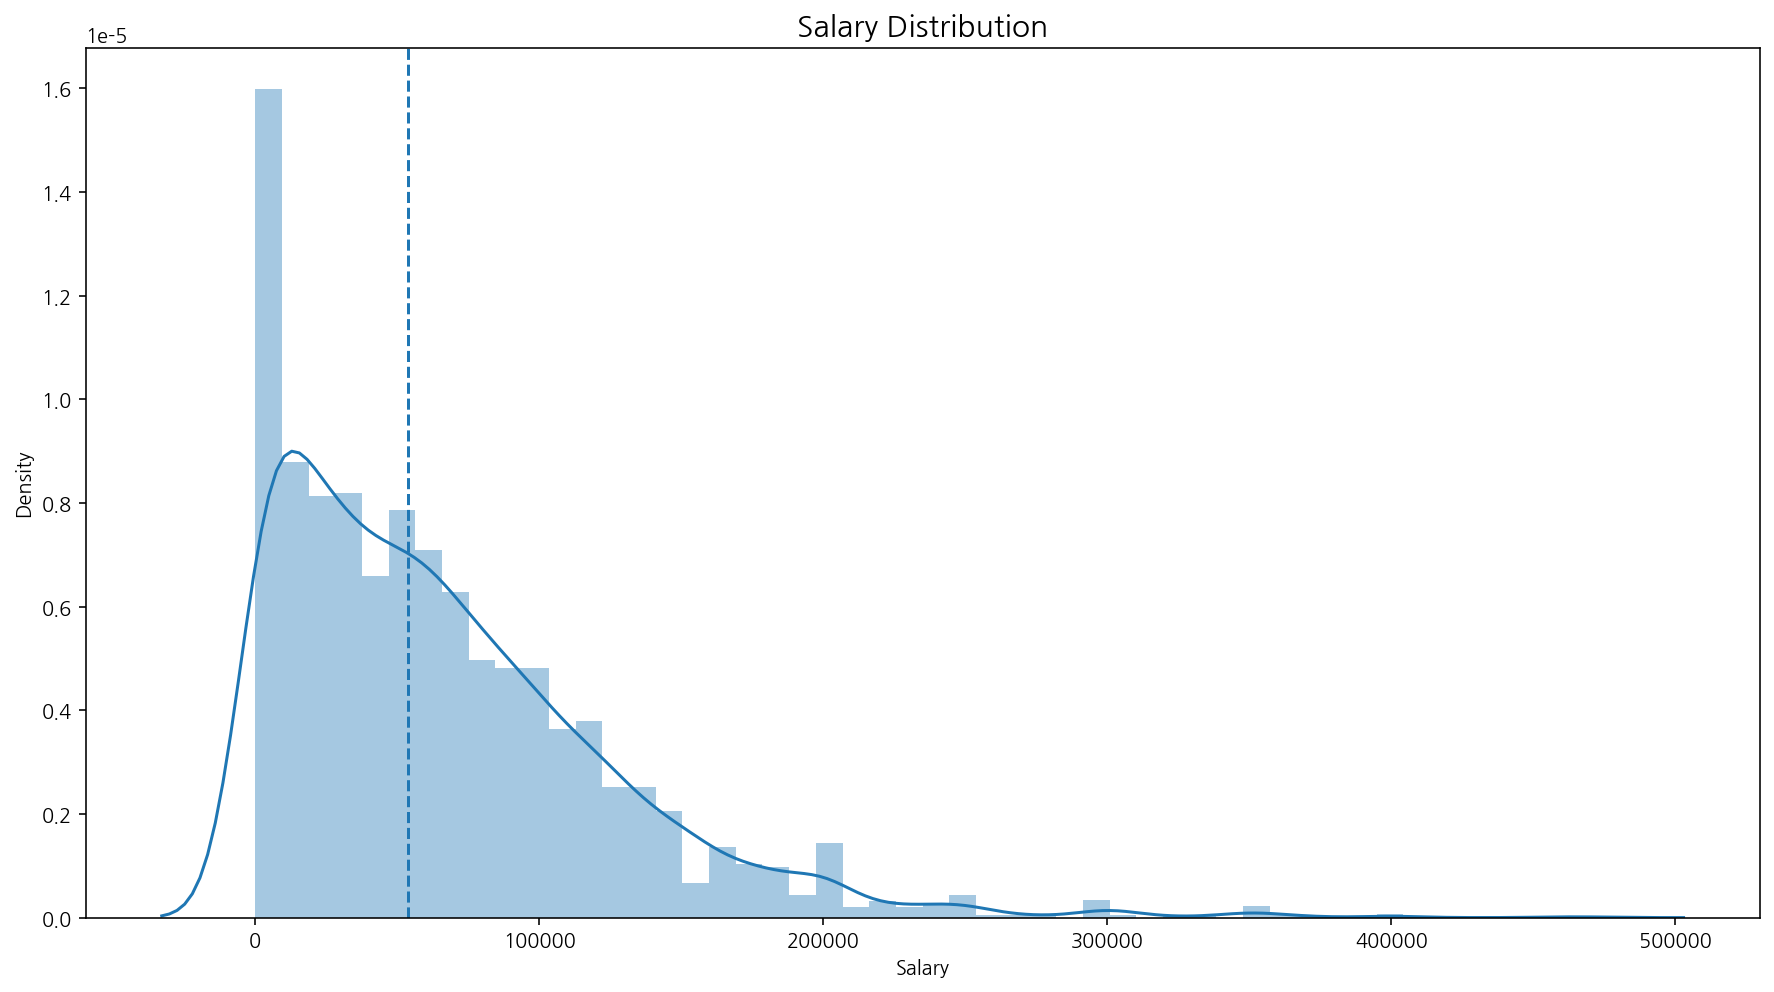

In [67]:
# 그래프를 좀 더 잘 표현하기 위해 50만불 이상의 데이터만 displot으로 시각화
plt.subplots(figsize=(15,8))
salary=salary[salary['Salary']<500000]
sns.distplot(salary['Salary'])
plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Salary Distribution',size=15)

Text(0.5, 1.0, 'Highest Salary Paying Countries')

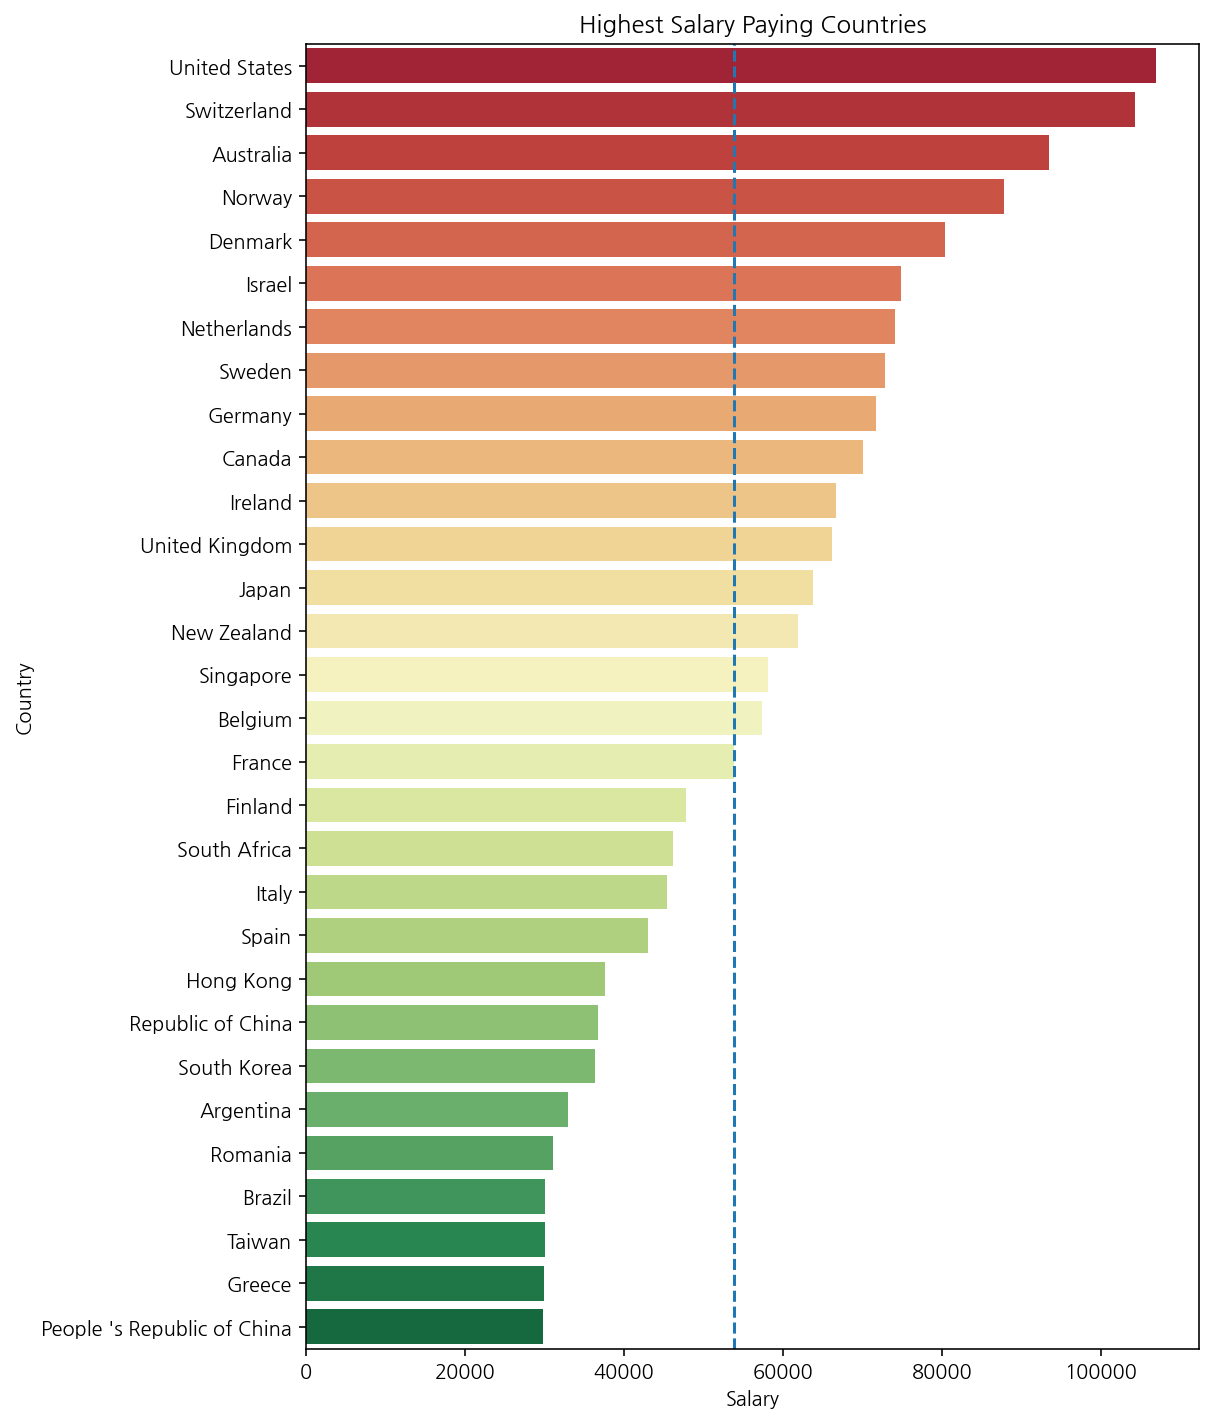

In [68]:
# 국가별 임금 확인 시각화
plt.subplots(figsize = (8,12))
sal_coun = salary.groupby('Country')['Salary'].median().sort_values(
    ascending = False)[:30].to_frame()

sns.barplot('Salary', sal_coun.index, data = sal_coun, palette ='RdYlGn')
plt.axvline(salary['Salary'].median(), linestyle = 'dashed')
plt.title('Highest Salary Paying Countries')

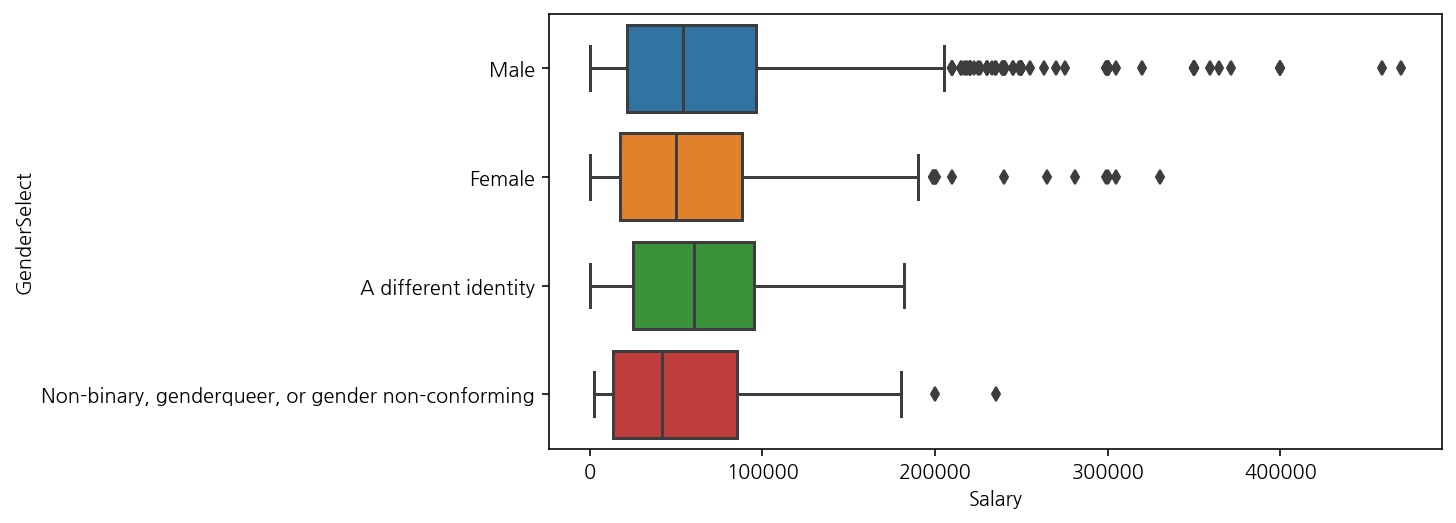

In [69]:
# 성별 임금격차 확인
plt.subplots(figsize = (8,4))
sns.boxplot(y = 'GenderSelect', x = 'Salary', data = salary)

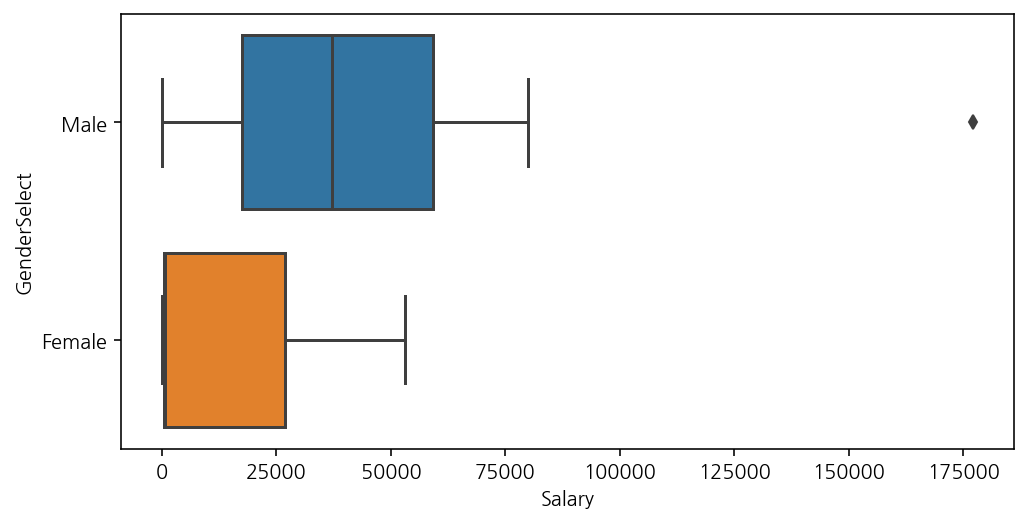

In [70]:
# 한국 성별 임금격차
salary_korea = salary.loc[(salary['Country'] == 'South Korea')]
plt.subplots(figsize = (8,4))
sns.boxplot(y = 'GenderSelect', x = 'Salary', data = salary_korea)

In [71]:
salary_korea.shape

(26, 8)

In [72]:
# 응답자 수가 3명밖에 없기때문에 일반화 하지 말아야 함.
salary_korea[salary_korea['GenderSelect'] == 'Female']

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
479,30000,KRW,Female,South Korea,Data Analyst,KRW,0.000886,26.58
2903,800000,KRW,Female,South Korea,Researcher,KRW,0.000886,708.80
4063,60000000,KRW,Female,South Korea,Researcher,KRW,0.000886,53160.00


In [73]:
# 한국 남성 평균 급여(데이터사이언티스트)
salary_korea_male = salary_korea[salary_korea['GenderSelect'] == 'Male']
salary_korea_male['Salary'].describe()

count        23.000000
mean      43540.617217
std       37800.608484
min           0.886000
25%       17500.000000
50%       37212.000000
75%       59238.000000
max      177200.000000
Name: Salary, dtype: float64

In [74]:
salary_korea_male

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
85,40000000,KRW,Male,South Korea,Business Analyst,KRW,0.000886,35440.000
147,80000,USD,Male,South Korea,Researcher,USD,1.000000,80000.000
314,60000,USD,Male,South Korea,Business Analyst,USD,1.000000,60000.000
333,60000000,KRW,Male,South Korea,Researcher,KRW,0.000886,53160.000
562,50000000,KRW,Male,South Korea,Researcher,KRW,0.000886,44300.000
769,42000000,KRW,Male,South Korea,Software Developer/Software Engineer,KRW,0.000886,37212.000
799,1000,KRW,Male,South Korea,Machine Learning Engineer,KRW,0.000886,0.886
1060,75000000,KRW,Male,South Korea,Scientist/Researcher,KRW,0.000886,66450.000
1360,30000000,KRW,Male,South Korea,Statistician,KRW,0.000886,26580.000
1568,90000,SGD,Male,South Korea,Computer Scientist,SGD,0.742589,66833.010


# Q9 개인프로젝트나 학습용 데이터는 어디에서 얻는가?

In [75]:
# 데이터 정리
mcq['PublicDatasetsSelect'] = mcq['PublicDatasetsSelect'].astype('str').apply(
    lambda x: x.split(',')
)

In [76]:
q = mcq.apply(lambda x: pd.Series(x['PublicDatasetsSelect']),
              axis=1).stack().reset_index(level = 1, drop = True)

q.name = 'courses'

In [77]:
q = q[q != 'nan'].value_counts()

In [78]:
pd.DataFrame(q)

,courses
Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.),6843
Google Search,3600
University/Non-profit research group websites,2873
I collect my own data (e.g. web-scraping),2560
GitHub,2400
Government website,2079
Other,399


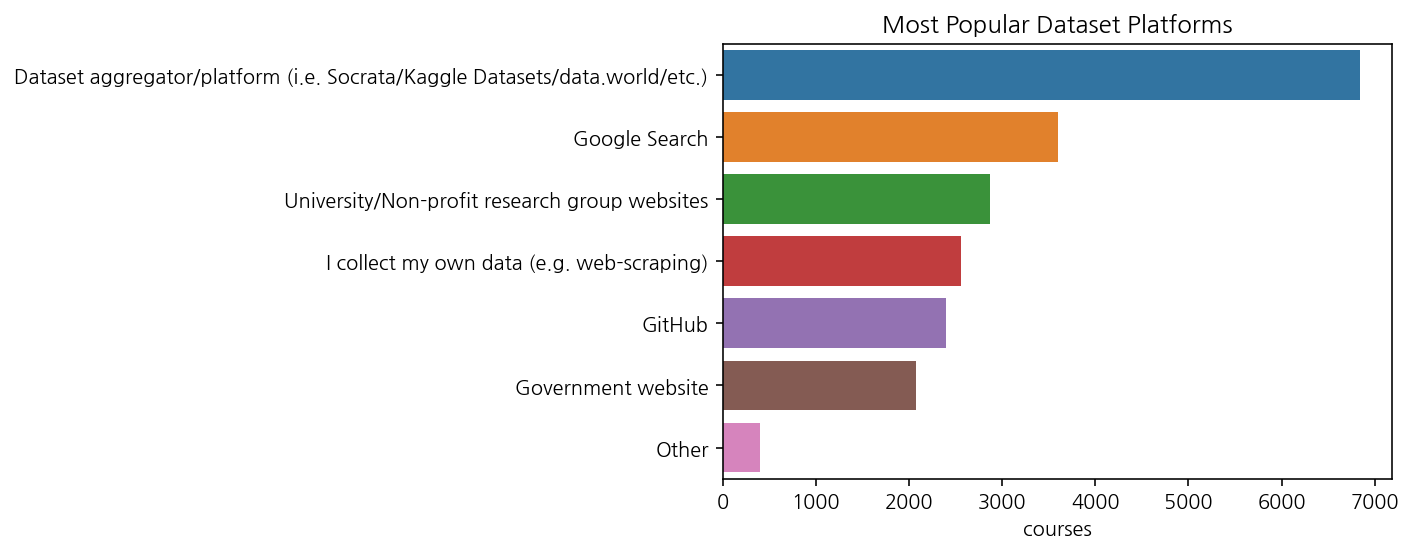

In [79]:
# 정리한 데이터 시각화
plt.title("Most Popular Dataset Platforms")
sns.barplot(y = q.index, x = q)

* Kaggle 및 Socrata는 개인 프로젝트나 학습에 사용하기 위한 데이터를 얻는데 인기있는 플랫폼.
* 구글검색 및 대학/비영리 단체 웹사이트는 각각 2위와 3위
* 직접 웹스크래핑 등을 통한 데이터 수집은 4위

In [80]:
# 주관식 응답 읽어오기
ff = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA/2017 캐글 머신러닝 및 데이터 사이언스 설문조사/freeformResponses.csv',
                 encoding = "ISO-8859-1", low_memory = False)
ff.shape

(16716, 62)

In [81]:
ff.columns

Index(['GenderFreeForm', 'KaggleMotivationFreeForm', 'CurrentJobTitleFreeForm',
       'MLToolNextYearFreeForm', 'MLMethodNextYearFreeForm',
       'LanguageRecommendationFreeForm', 'PublicDatasetsFreeForm',
       'PersonalProjectsChallengeFreeForm',
       'LearningPlatformCommunityFreeForm', 'LearningPlatformFreeForm1',
       'LearningPlatformFreeForm2', 'LearningPlatformFreeForm3',
       'LearningPlatformUsefulnessCommunitiesFreeForm',
       'LearningPlatformUsefulnessFreeForm1Select',
       'LearningPlatformUsefulnessFreeForm1SelectFreeForm',
       'LearningPlatformUsefulnessFreeForm2Select',
       'LearningPlatformUsefulnessFreeForm2SelectFreeForm',
       'LearningPlatformUsefulnessFreeForm3Select',
       'LearningPlatformUsefulnessFreeForm3SelectFreeForm',
       'BlogsPodcastsNewslettersFreeForm',
       'JobSkillImportanceOtherSelect1FreeForm',
       'JobSkillImportanceOtherSelect2FreeForm',
       'JobSkillImportanceOtherSelect3FreeForm', 'CoursePlatformFreeForm',
  

In [82]:
# 설문 내용과 누구에게 질문한 것인지 확인
qc = question.loc[question['Column'].str.contains('PersonalProjectsChallengeFreeForm')]
print(qc.shape)
qc.Question.values[0]

(1, 3)


'What is your biggest challenge with the public datasets you find for personal projects?'

### 개인 프로젝트에서 공개된 데이터 셋을 다루는 데 가장 어려운 점은?

In [83]:
ppcff = ff['PersonalProjectsChallengeFreeForm'].value_counts().head(15)
ppcff.name = '응답 수'
pd.DataFrame(ppcff)

,응답 수
None,23
Cleaning,20
Cleaning the data,20
Dirty data,16
Data Cleaning,14
none,13
dirty data,10
Data cleaning,10
Size,9
-,9


대부분 데이터 정제라 응답.

# Q10 데이터사이언스 업무에서 가장 많은 시간이 필요한 일은?

In [84]:
time_features = [x for x in mcq.columns if x.find('Time') != -1][4:10]

GatheringData      36.144754
ModelBuilding      21.268066
Production         10.806372
Visualizing        13.869372
FindingInsights    13.094776
OtherSelect         2.396247
dtype: float64



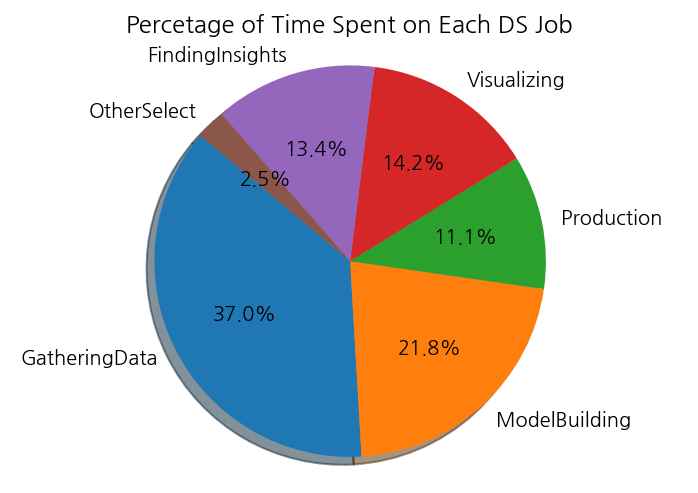

In [85]:
tdf = {}
for feature in time_features:
  tdf[feature[len('Time'):]] = mcq[feature].mean()

tdf = pd.Series(tdf)
print(tdf)
print()

plt.pie(tdf, labels = tdf.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percetage of Time Spent on Each DS Job")
plt.show()

데이터 수집 업무가 37% 비중으로 가장 크다. 그 다음으로는 모델 구축 후 시각화, 인사이트 찾기 순이다.

# Q11 데이터 사이언스 직업 찾기에 가장 고려해야 할 요소는 무엇?

In [86]:
# 설문 내용과 누구에게 질문했는지 확인
qc = question.loc[question['Column'].str.contains('JobFactor')]
print(qc.shape)
qc.Question.values

(16, 3)


array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

In [87]:
job_factors = [x for x in mcq.columns if x.find('JobFactor') != -1]

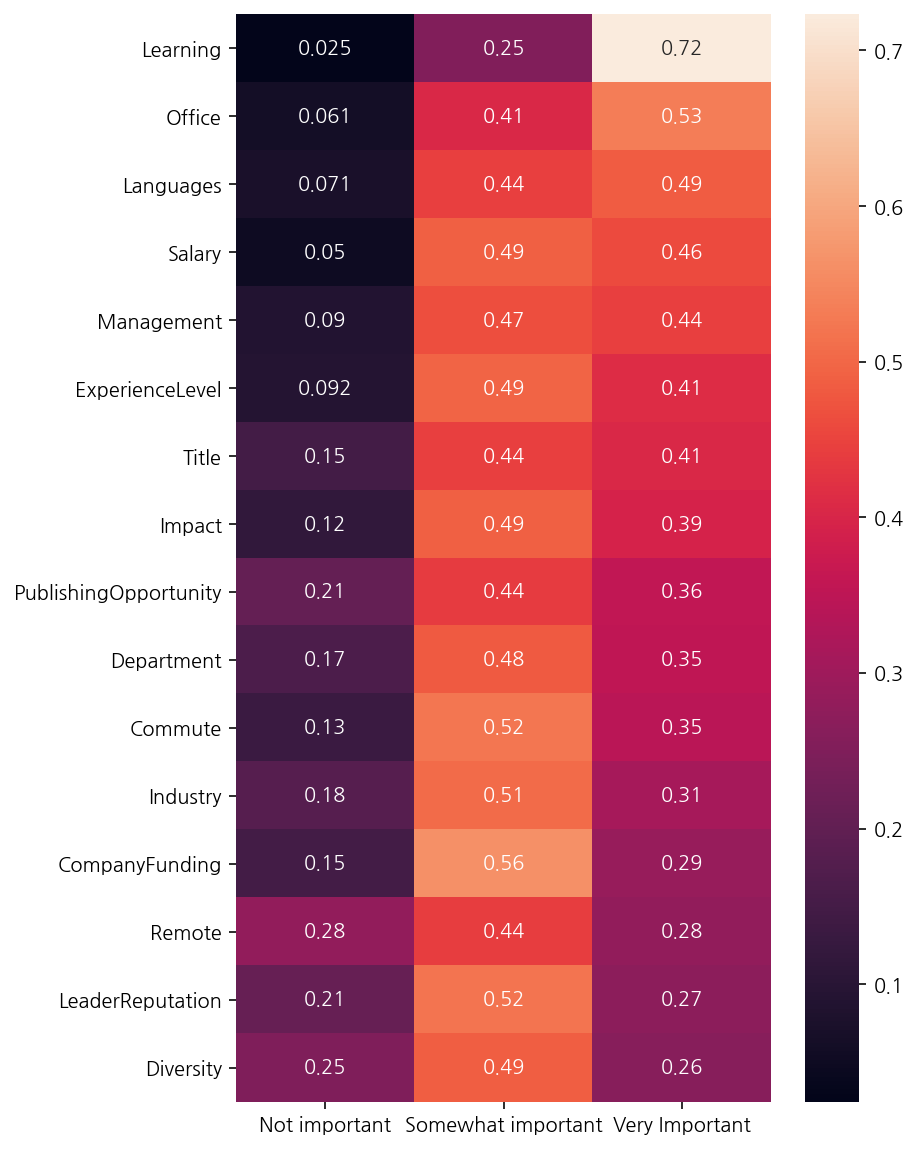

In [88]:
# 데이터 정리 및 히트맵으로 시각화
# 1에 가까운 것이 가장 중요
jfdf = {}
for feature in job_factors:
  a = mcq[feature].value_counts()
  a = a/a.sum()
  jfdf[feature[len('JobFactor'):]] = a

jfdf = pd.DataFrame(jfdf).transpose()

plt.figure(figsize=(6,10))
sns.heatmap(jfdf.sort_values('Very Important', ascending = False), annot = True)

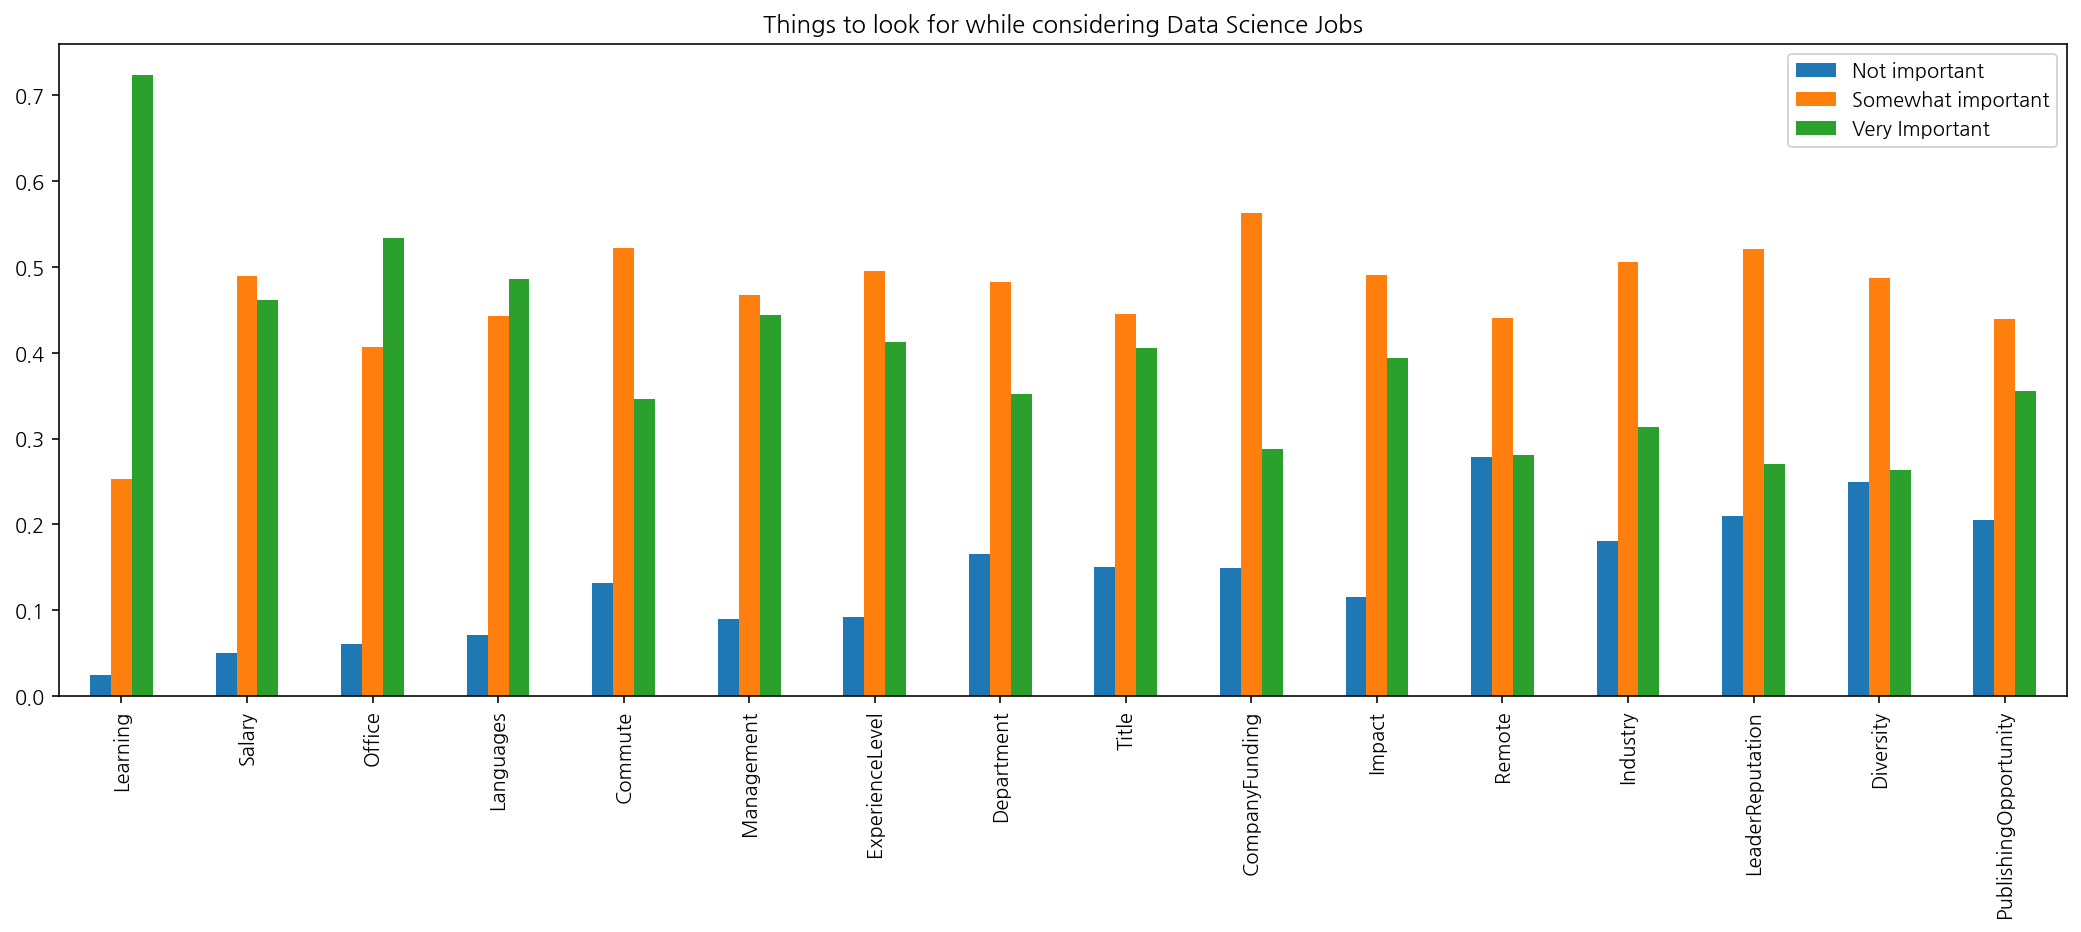

In [89]:
# 히트맵으로 시각화 한 데이터를 막대그래프로 시각화
jfdf.plot(kind='bar', figsize=(18,6),
         title = "Things to look for while considering Data Science Jobs")
plt.show()

* 데이터 사이언티스트로 작업을 찾을 때 가장 고려할 요소는 배울 수 있는 곳인지, 사무실 근무환경, 프레임워크 언어, 급여, 경영상태, 경쟁정도 순이다.

# Q12 데이터 사이언티스트가 되기위해 학위가 중요한가?

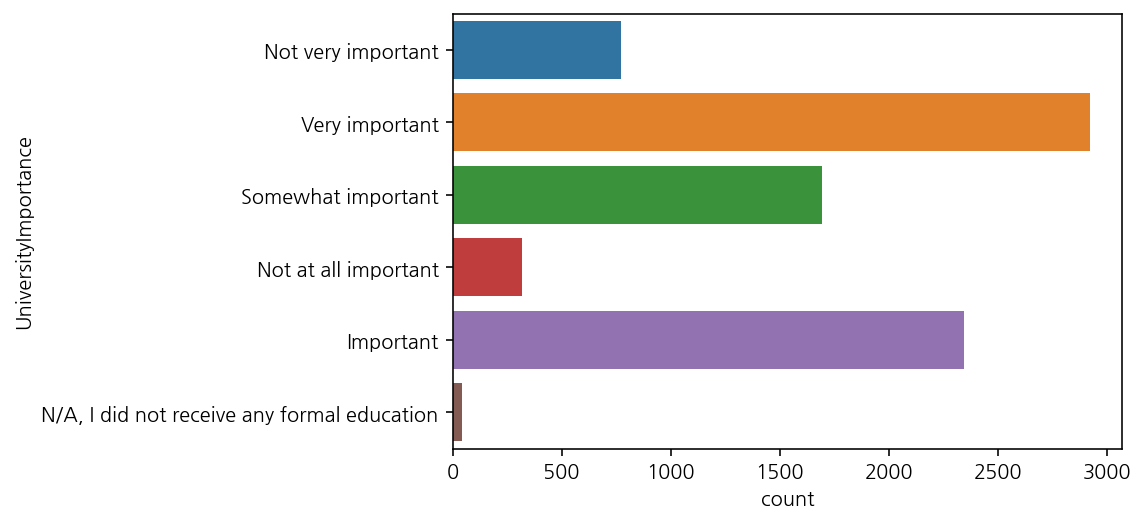

In [90]:
# 해당 질문 응답 시각화
sns.countplot(y = 'UniversityImportance', data = mcq)

# Q13 어디에서부터 데이터사이언스를 시작해야 할까?

In [117]:
# 응답자 수
mcq[mcq['FirstTrainingSelect'].notnull()].shape

(14712, 228)

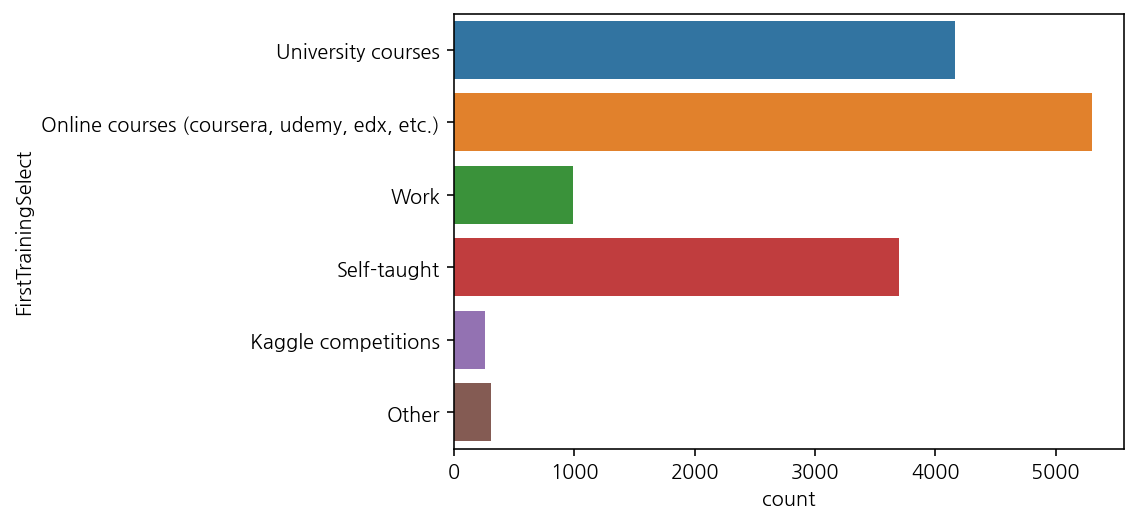

In [118]:
# 질문에 대한 응답 내용 시각화
sns.countplot(y='FirstTrainingSelect', data = mcq)

* 대부분 응답자가 학사학위 이상의 대학교육에 대한 중요성을 부여했으나 가장 많은 응답자가 코세라, 유데미와 같은 온라인 코스를 통해 데이터사이언스를 공부.
* 그 다음이 대학교육.
* 개인 프로젝트를 해보는 것도 중요하다고 응답한 사람도 꽤 있음.

# Q14 데이터사이언티스트 이력서에서 가장 중요한 것은?

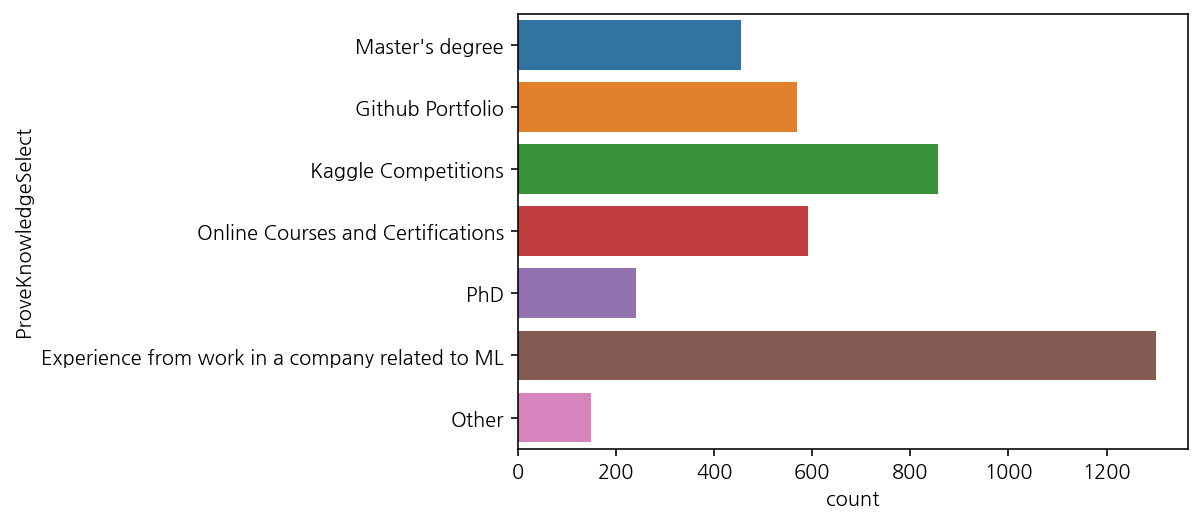

In [120]:
# 질문에 대한 응답 시각화
sns.countplot(y = 'ProveKnowledgeSelect', data = mcq)

직무경험>캐글 경진대회>온라인강좌 수료증>프트폴리오 순으로 중요하다고 응답

# Q15 머신러닝 알고리즘 사용을 위해 수학공부가 필요할까?

scikit과 같은 라이브러리 세부 정보를 추상화하여 기본기술은 몰라도 ML모델 프로그래밍이 가능해도 그 안의 수학을 아는 것이 중요할까?

In [122]:
# 설문내용과 누구에게 물어봤는지 출력
qc = question.loc[question['Column'].str.contains('AlgorithmUnderstandingLevel')]
qc

,Column,Question,Asked
227,AlgorithmUnderstandingLevel,At which level do you understand the mathemati...,CodingWorker


In [123]:
# 응답자 수 확인
mcq[mcq['AlgorithmUnderstandingLevel'].notnull()].shape

(7410, 228)

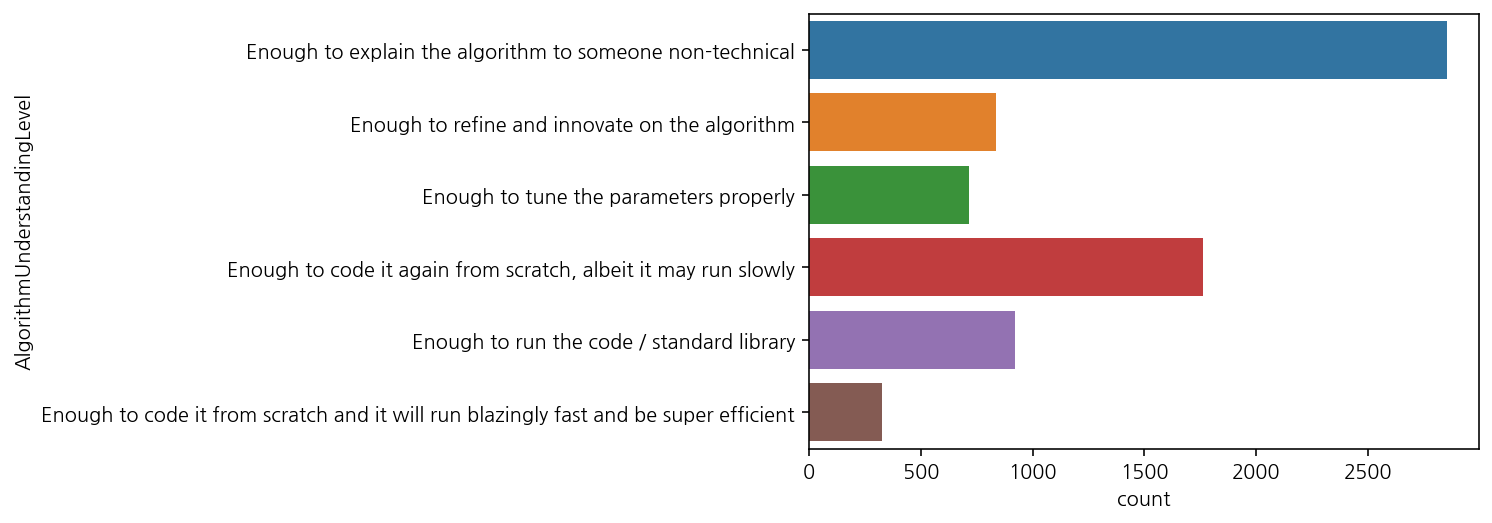

In [124]:
# 응답 내용 시각화
sns.countplot(y = 'AlgorithmUnderstandingLevel', data = mcq)

* 현재 코딩업무 하는 사람들에게 질문. 
* 기술과 관련 없는 사람에게 설명이 가능하면 충분하다는 응답이 다수
* 좀 더디더라도 기초부터 다시 코딩해 볼 수 있는 것이 중요하다가 2번째
* 코드를 돌릴 정도가 3번째


# Q16 어디에서 일을 찾아야 할까?

In [127]:
# 설문내용과 누구에게 질문한지 확인
question.loc[question['Column'].str.contains('JobSearchResource|EmployerSearchMethod')]

,Column,Question,Asked
108,EmployerSearchMethod,How did you find your current job? - Selected ...,CodingWorker-NC
109,EmployerSearchMethodOtherFreeForm,How did you find your current job? - Some othe...,CodingWorker-NC
271,JobSearchResource,Which resource has been the best for finding d...,Learners
272,JobSearchResourceFreeForm,Which resource has been the best for finding d...,Learners


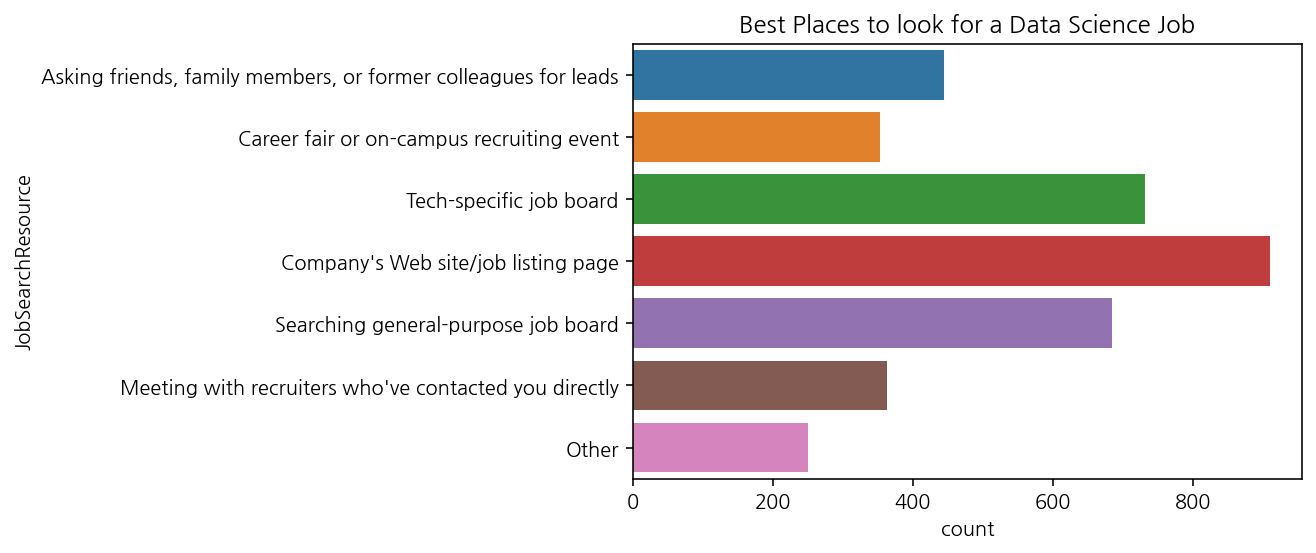

In [133]:
# 구직자들은 어떤 방법으로 직장을 찾는가?
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y = 'JobSearchResource', data = mcq)

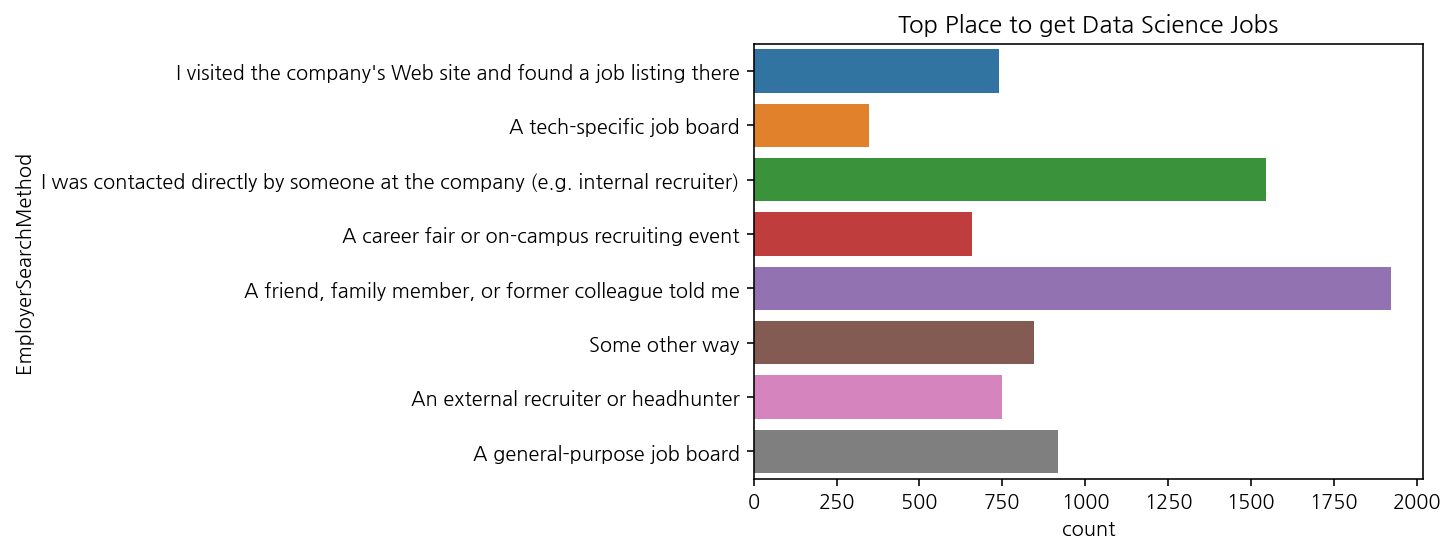

In [130]:
# 해당 질문에 대한 응답 데이터 시각화
# 채용자들은 어떤 방법으로 채용하는가?
plt.title("Top Place to get Data Science Jobs")
sns.countplot(y = 'EmployerSearchMethod', data = mcq)

### 한국은?

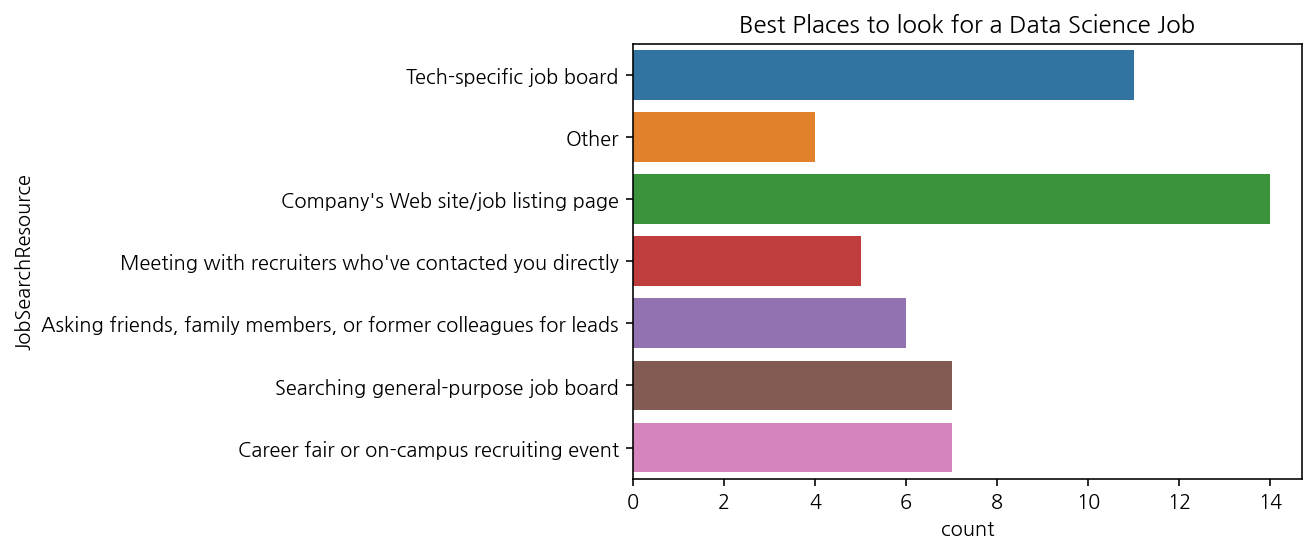

In [131]:
# 구직자
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y = 'JobSearchResource', data = korea)

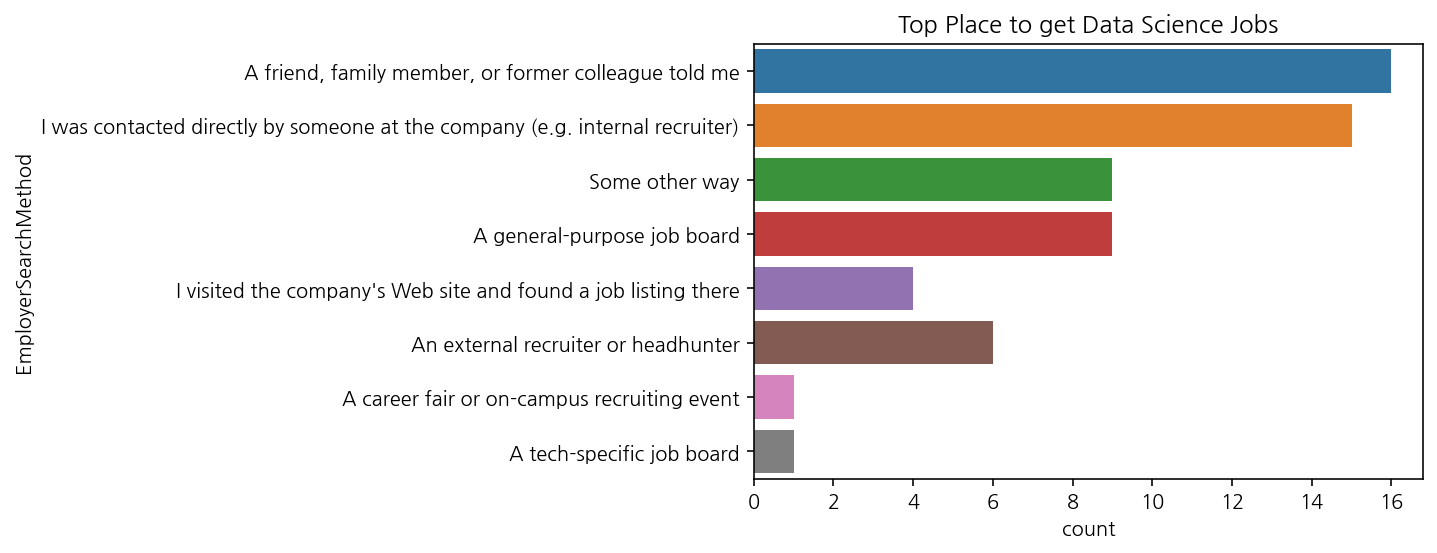

In [134]:
# 채용하는 사람
plt.title("Top Place to get Data Science Jobs")
sns.countplot(y = 'EmployerSearchMethod', data = korea)